In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.max_rows = 100

In [3]:
train_df = pd.read_csv('./data/train_data.csv').set_index('id')
test_df = pd.read_csv('./data/test_data.csv').set_index('id')

train_df['periodo_mes'] = pd.to_datetime(train_df.mes.astype('str') + '01').dt.to_period('M')
test_df['periodo_mes'] = pd.to_datetime(test_df.mes.astype('str') + '01').dt.to_period('M')

train_df['year'] = train_df.periodo_mes.dt.year
train_df['month'] = train_df.periodo_mes.dt.month
test_df['year'] = test_df.periodo_mes.dt.year
test_df['month'] = test_df.periodo_mes.dt.month

print(f'Train Set con {train_df.shape[0]} filas y {train_df.shape[1]} columnas')
print(f'Test Set con {test_df.shape[0]} filas y {test_df.shape[1]} columnas')

Train Set con 667691 filas y 72 columnas
Test Set con 292016 filas y 71 columnas


<AxesSubplot:ylabel='Frequency'>

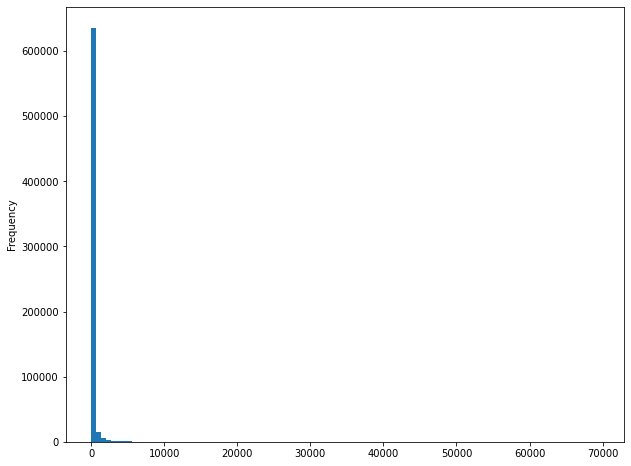

In [10]:
import numpy as np
train_df.target_mes.agg({np.min, np.max})

#train_df.target_mes.plot(kind = 'hist', bins=30, xlim = [0,10000])

plt.hist(np.log1p(train_df.target_mes))
train_df.target_mes.plot(kind = 'hist', bins = 100, figsize = (10,8))

(array([ 74575.,  87860., 182538., 156211.,  92696.,  46101.,  19612.,
          6512.,   1341.,    245.]),
 array([ 0.        ,  1.11480915,  2.22961829,  3.34442744,  4.45923659,
         5.57404573,  6.68885488,  7.80366403,  8.91847318, 10.03328232,
        11.14809147]),
 <BarContainer object of 10 artists>)

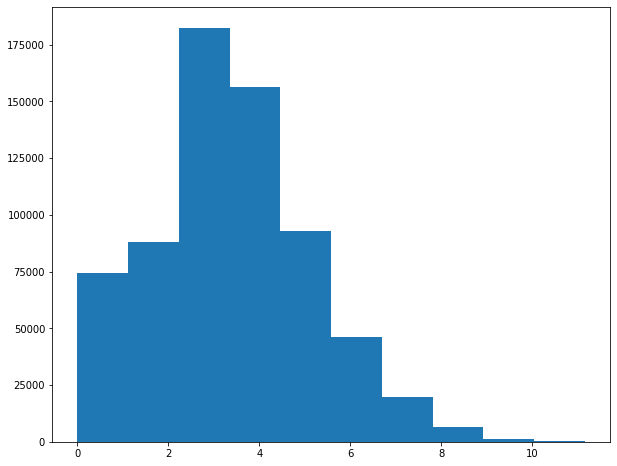

In [12]:
plt.figure(figsize=(10,8))
plt.hist(np.log1p(train_df.target_mes))

In [4]:
train_df.dtypes

mes                int64
tipo_ban          object
tipo_seg          object
categoria         object
tipo_com          object
tipo_cat          object
tipo_cli          object
VAR1_sum         float64
VAR1_prom        float64
VAR1_trx         float64
VAR2_sum         float64
VAR2_prom        float64
VAR2_trx         float64
VAR3_sum         float64
VAR3_prom        float64
VAR3_trx         float64
VAR4_sum         float64
VAR4_prom        float64
VAR4_trx         float64
VAR5_sum         float64
VAR5_prom        float64
VAR5_trx         float64
VAR6_sum         float64
VAR6_prom        float64
VAR6_trx         float64
VAR7_sum         float64
VAR7_prom        float64
VAR7_trx         float64
VAR8_sum         float64
VAR8_prom        float64
VAR8_trx         float64
VAR9_sum         float64
VAR9_prom        float64
VAR9_trx         float64
VAR10_sum        float64
VAR11_sum        float64
VAR12_sum        float64
VAR13_sum        float64
VAR14_sum        float64
VAR15_sum        float64


In [5]:
test_df.dtypes

mes                int64
tipo_ban          object
tipo_seg          object
categoria         object
tipo_com          object
tipo_cat          object
tipo_cli          object
VAR1_sum         float64
VAR1_prom        float64
VAR1_trx         float64
VAR2_sum         float64
VAR2_prom        float64
VAR2_trx         float64
VAR3_sum         float64
VAR3_prom        float64
VAR3_trx         float64
VAR4_sum         float64
VAR4_prom        float64
VAR4_trx         float64
VAR5_sum         float64
VAR5_prom        float64
VAR5_trx         float64
VAR6_sum         float64
VAR6_prom        float64
VAR6_trx         float64
VAR7_sum         float64
VAR7_prom        float64
VAR7_trx         float64
VAR8_sum         float64
VAR8_prom        float64
VAR8_trx         float64
VAR9_sum         float64
VAR9_prom        float64
VAR9_trx         float64
VAR10_sum        float64
VAR11_sum        float64
VAR12_sum        float64
VAR13_sum        float64
VAR14_sum        float64
VAR15_sum        float64


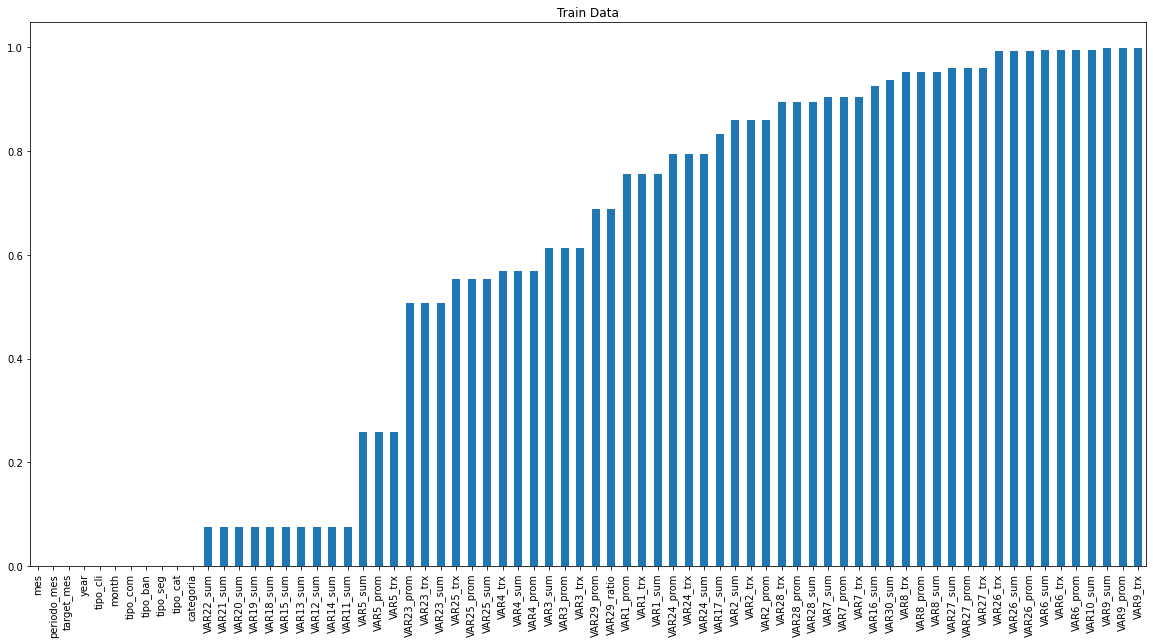

In [6]:
def check_nulls(df, name):
    data = (df.isnull().sum()/len(df)).sort_values()
    data.plot(kind='bar', figsize = (20,10), title = name)
    
check_nulls(train_df, 'Train Data')


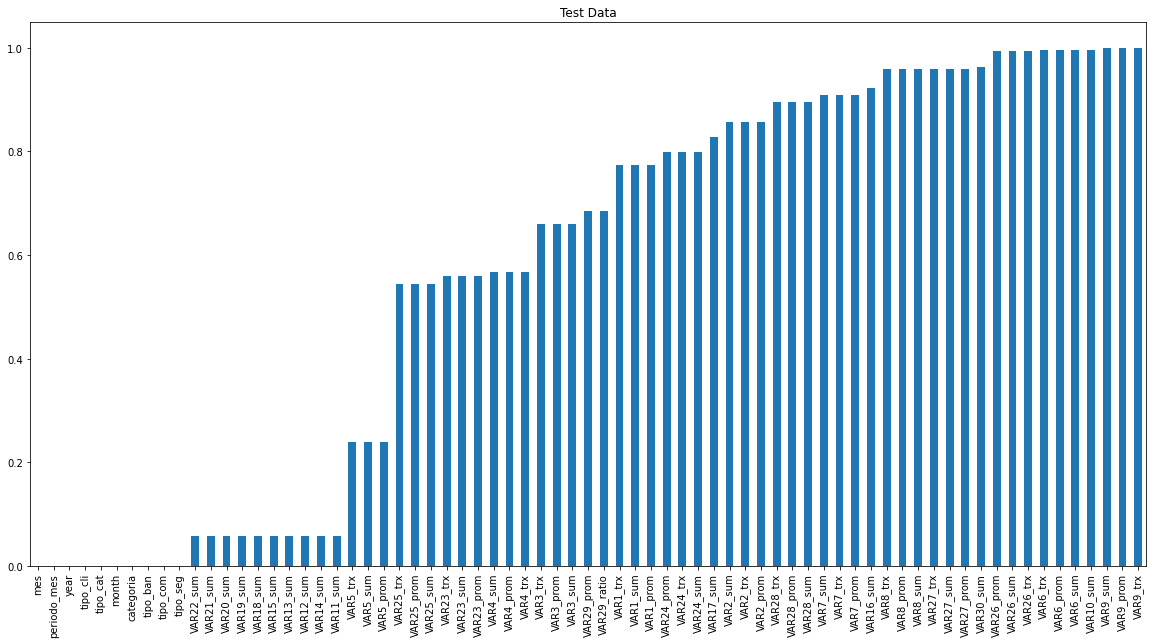

In [7]:
check_nulls(test_df, 'Test Data')

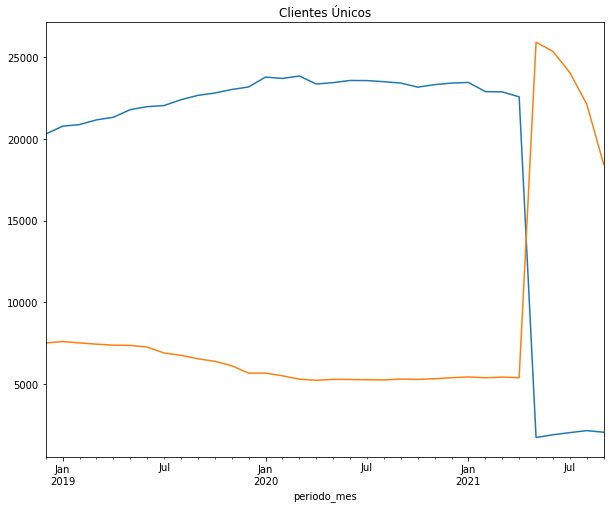

In [8]:
def unique_customers(df, name, figsize = (10,8)):
    df.groupby('periodo_mes').id.nunique().plot(figsize = figsize, title = name)
    
unique_customers(train_df.reset_index(), name = 'Train Set')
unique_customers(test_df.reset_index(), name = 'Clientes Únicos')

In [9]:
def calculate_null_perc(df):
    nulos = df.groupby('periodo_mes').apply(lambda x: x.isnull().sum()).mean(axis=1)
    total = df.groupby('periodo_mes').size()
    return nulos/total

calculate_null_perc(train_df)


periodo_mes
2018-12    0.555372
2019-01    0.549805
2019-02    0.558535
2019-03    0.556532
2019-04    0.556815
2019-05    0.556556
2019-06    0.563004
2019-07    0.557223
2019-08    0.557207
2019-09    0.558085
2019-10    0.556852
2019-11    0.559084
2019-12    0.556804
2020-01    0.548129
2020-02    0.562170
2020-03    0.558523
2020-04    0.566778
2020-05    0.553448
2020-06    0.567945
2020-07    0.573682
2020-08    0.580821
2020-09    0.576460
2020-10    0.576300
2020-11    0.575282
2020-12    0.574736
2021-01    0.567210
2021-02    0.575790
2021-03    0.567918
2021-04    0.573324
2021-05    0.608826
2021-06    0.611403
2021-07    0.609409
2021-08    0.611736
2021-09    0.608110
Freq: M, dtype: float64

In [10]:
calculate_null_perc(test_df)

periodo_mes
2018-12    0.570271
2019-01    0.564440
2019-02    0.572037
2019-03    0.571158
2019-04    0.570754
2019-05    0.570503
2019-06    0.575376
2019-07    0.567419
2019-08    0.566802
2019-09    0.567178
2019-10    0.565803
2019-11    0.567956
2019-12    0.563388
2020-01    0.552447
2020-02    0.565637
2020-03    0.559859
2020-04    0.567828
2020-05    0.554062
2020-06    0.567499
2020-07    0.574579
2020-08    0.583054
2020-09    0.578489
2020-10    0.578403
2020-11    0.578892
2020-12    0.578649
2021-01    0.570610
2021-02    0.580890
2021-03    0.572876
2021-04    0.579142
2021-05    0.576231
2021-06    0.581901
2021-07    0.580446
2021-08    0.586813
2021-09    0.585549
Freq: M, dtype: float64

<AxesSubplot:xlabel='year'>

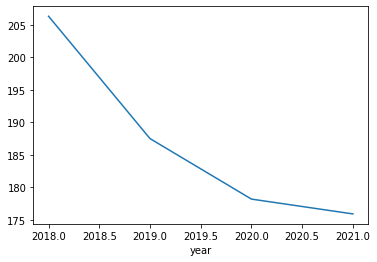

In [11]:
train_df.groupby('year').target_mes.mean().plot()

<AxesSubplot:xlabel='year'>

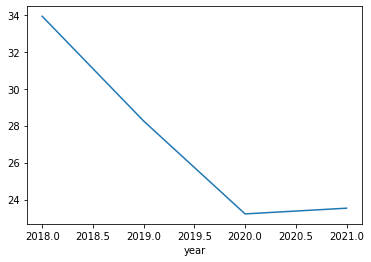

In [12]:
train_df.groupby('year').target_mes.median().plot()

> La sobreestimación es menos deseable que la subestimación. Por lo tanto no debería ser tan buena idea el utilizar periodos de entrenamiento de 2019 y 2018.

> Esto podría deberse también al split de train y test. Hemos visto que hay muchos menos clientes en los últimos meses de 2021, aunque este es un fenómeno local, mucho más específico.

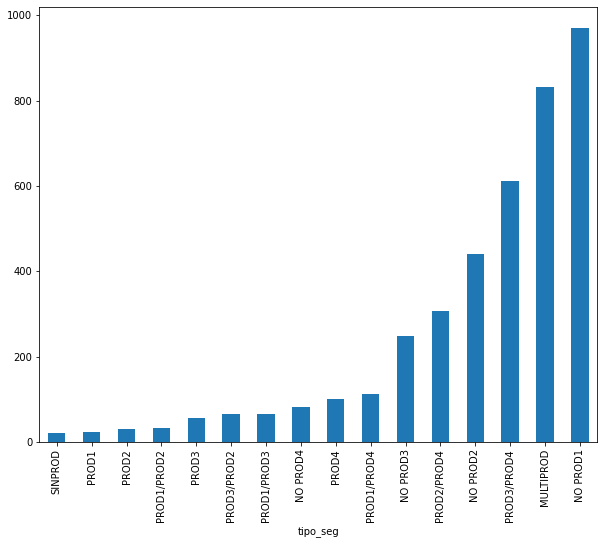

In [13]:
def check_variable(variable, figsize = (10,8)):
    return train_df.groupby(variable).target_mes.mean().sort_values().plot(kind = 'bar', figsize = figsize)

check_variable('tipo_seg');


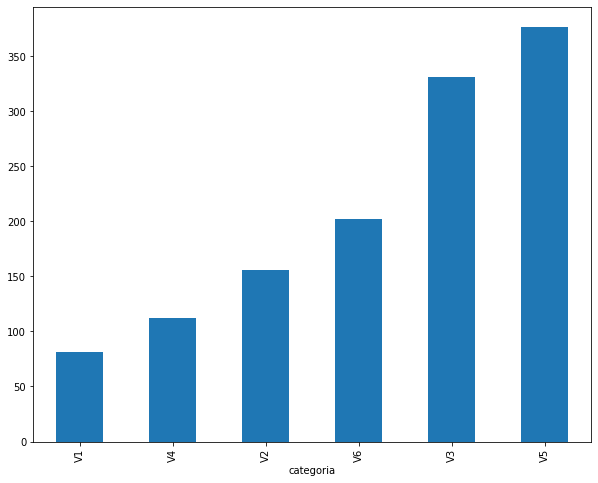

In [14]:
check_variable('categoria');


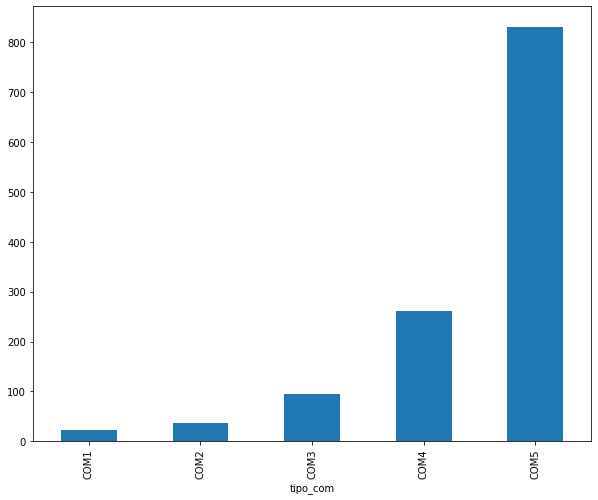

In [15]:
check_variable('tipo_com');

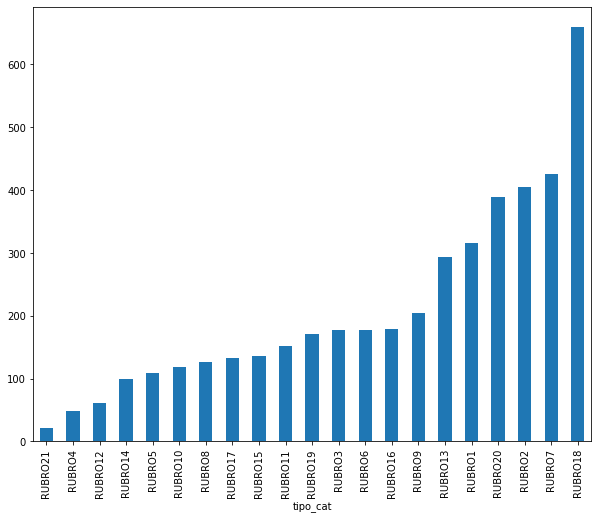

In [16]:
check_variable('tipo_cat');

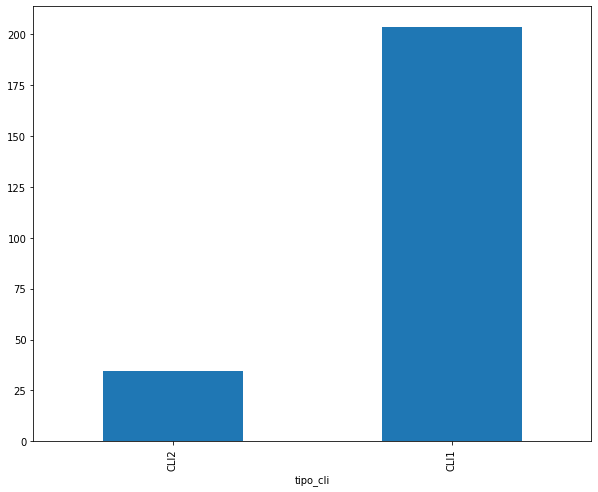

In [17]:
check_variable('tipo_cli');

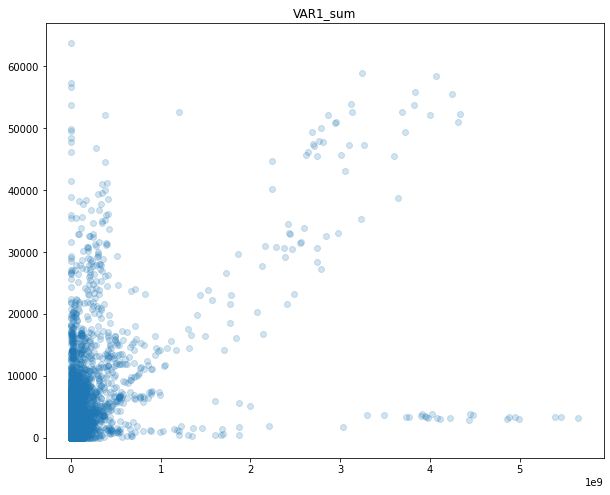

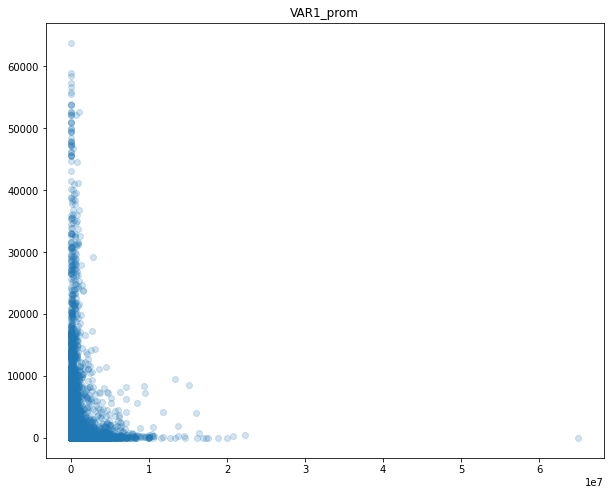

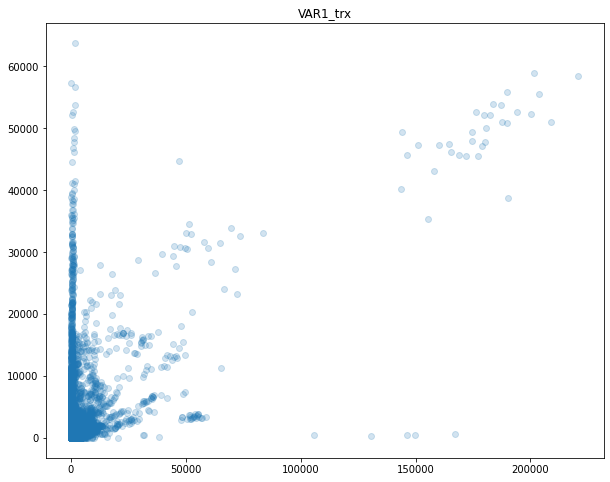

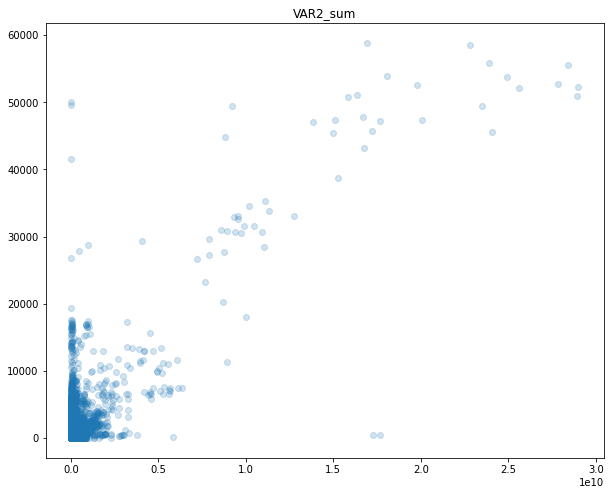

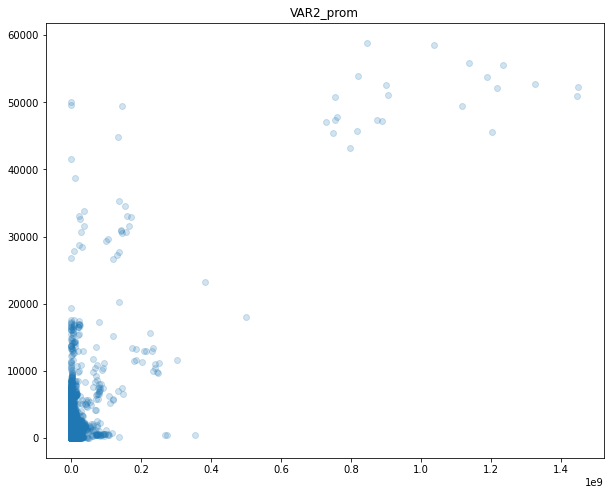

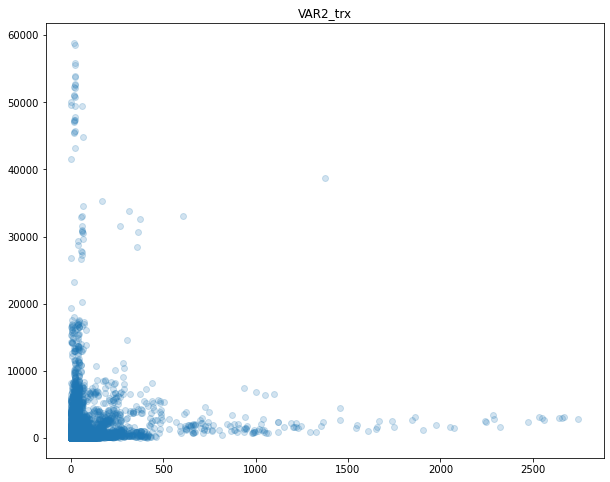

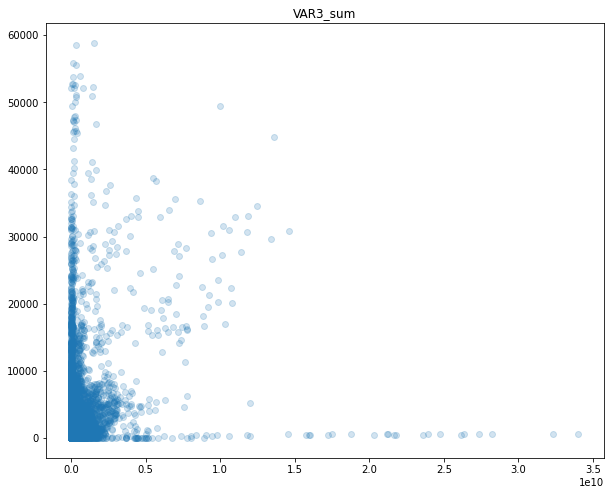

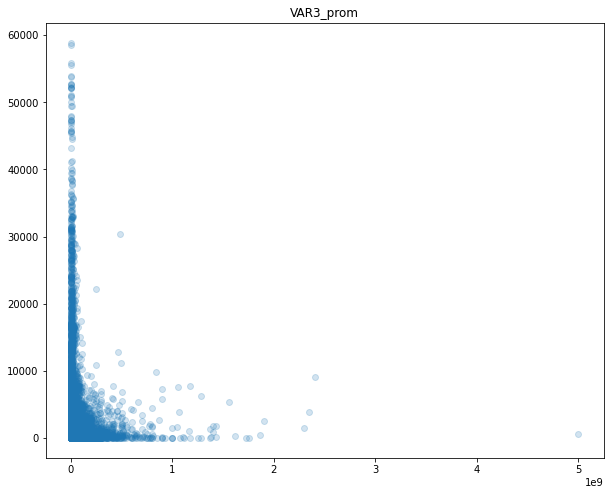

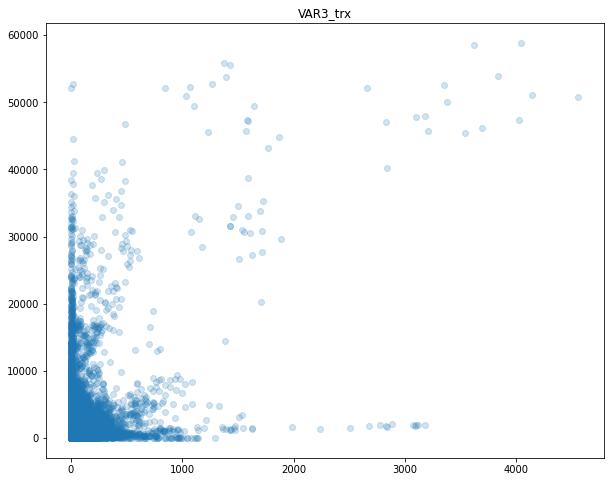

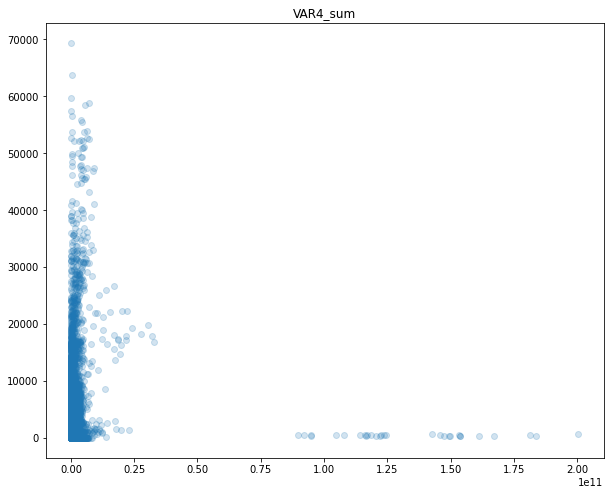

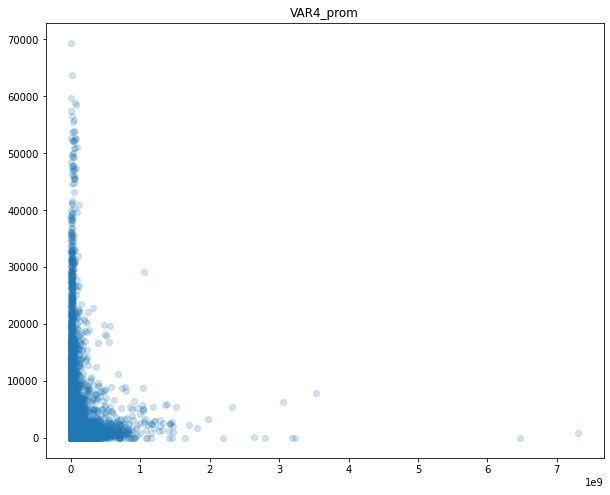

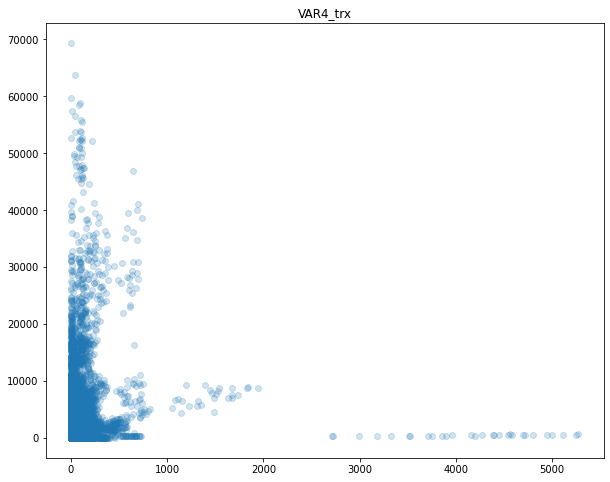

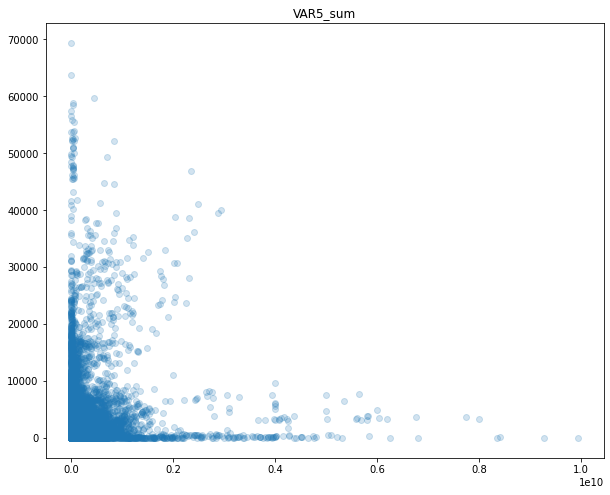

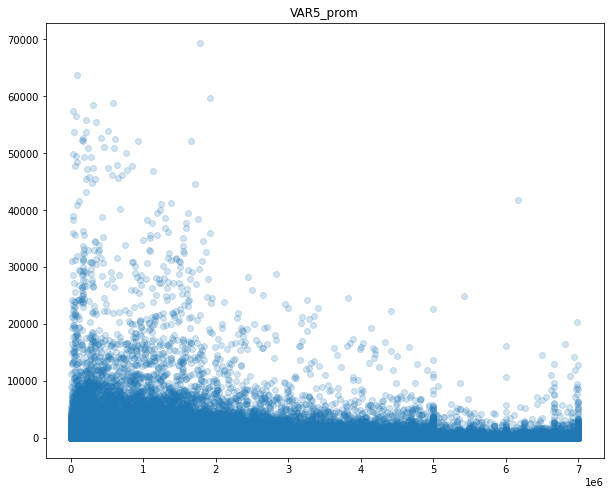

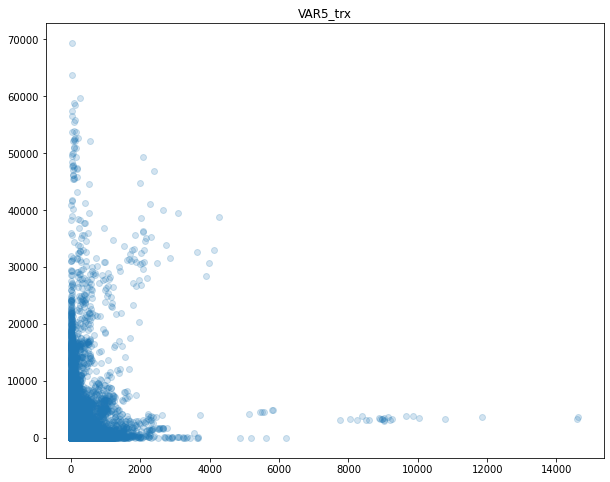

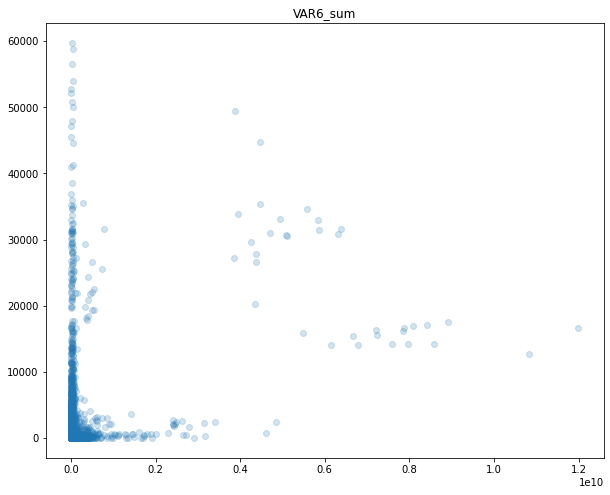

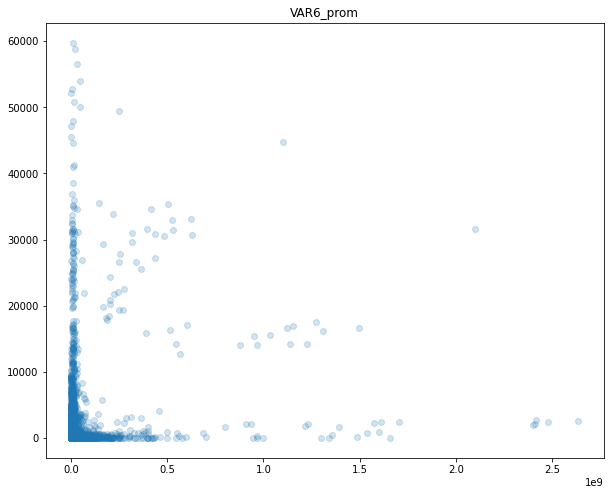

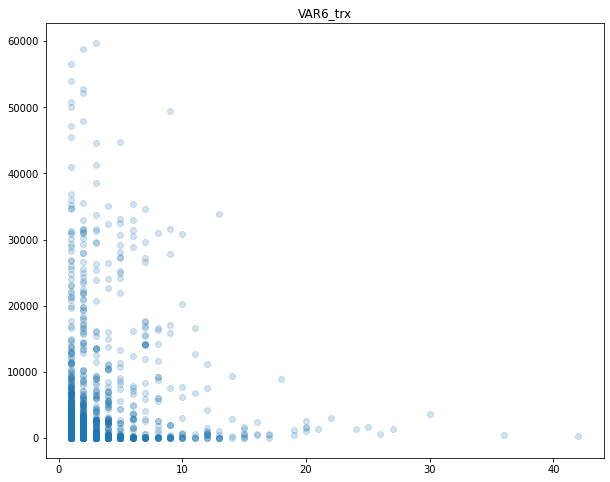

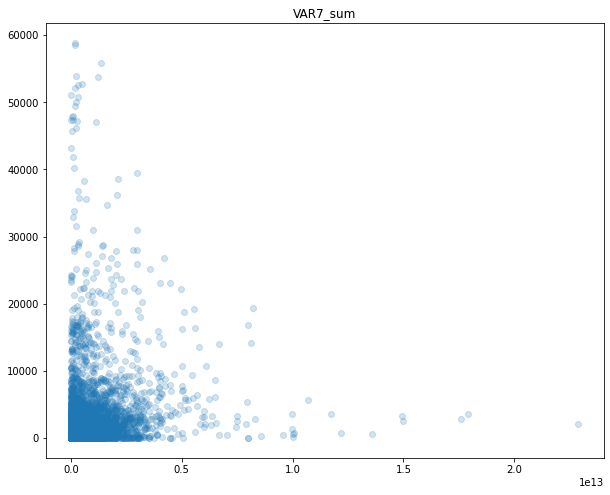

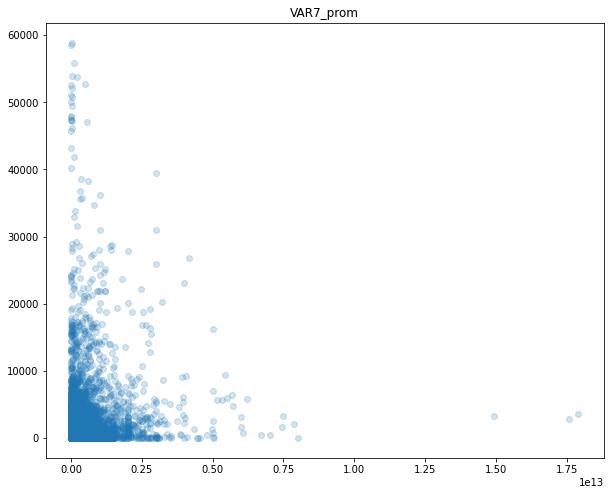

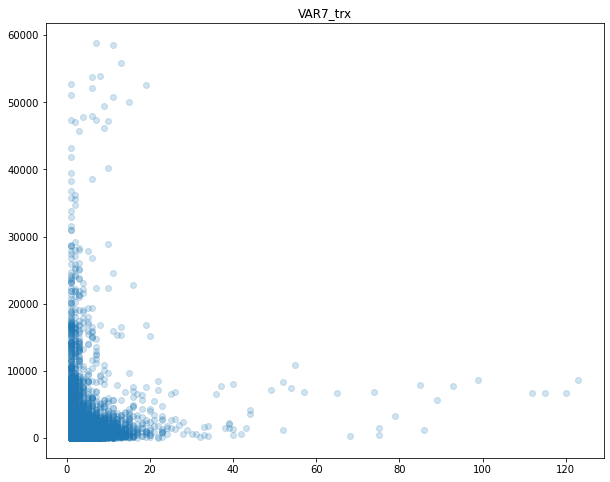

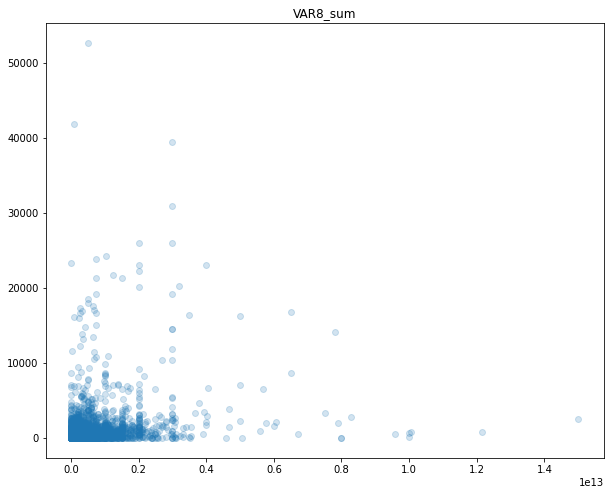

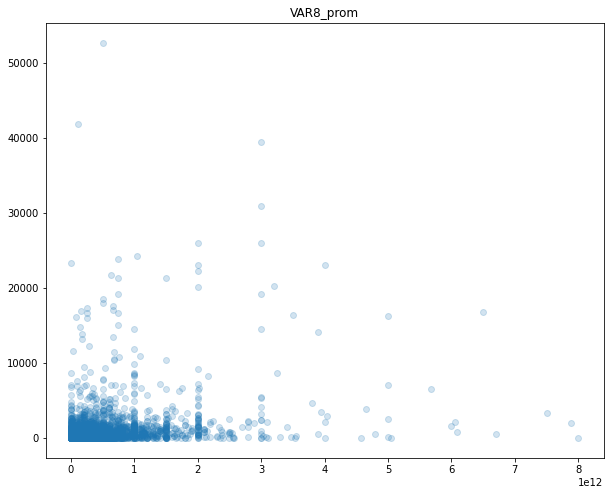

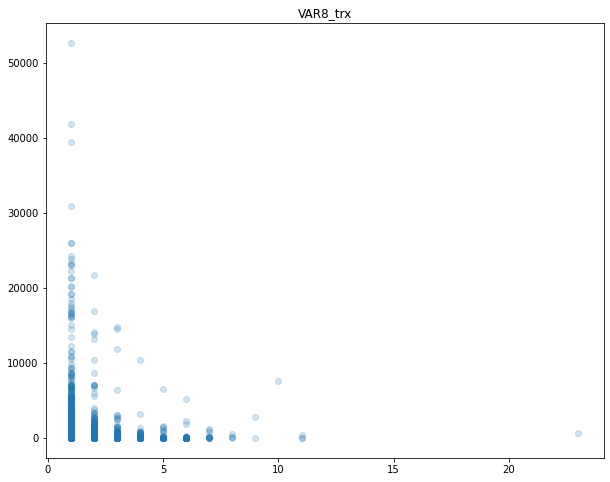

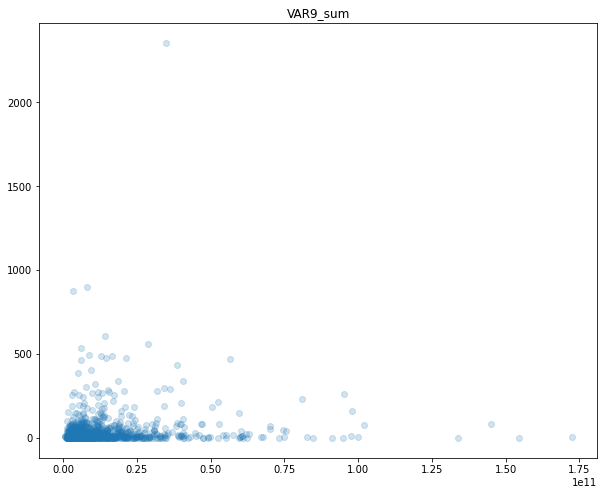

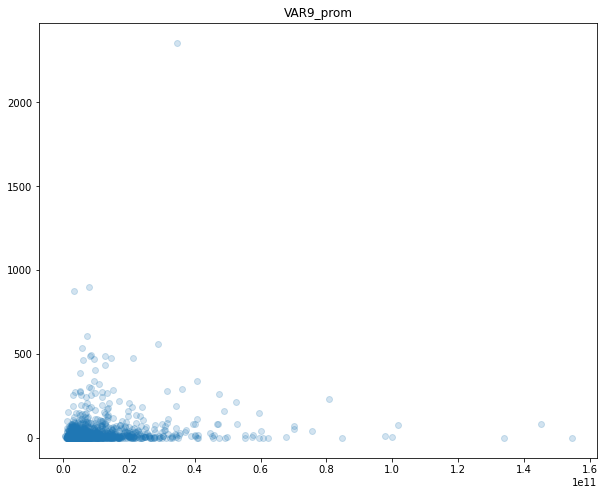

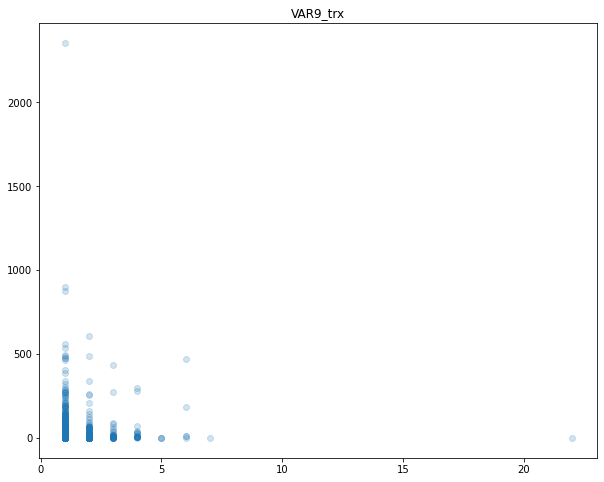

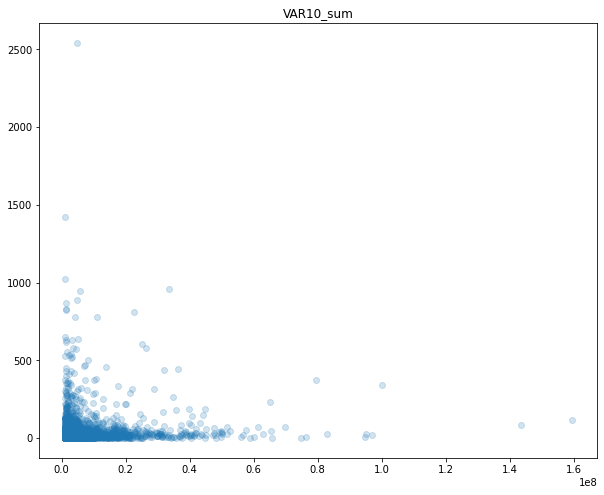

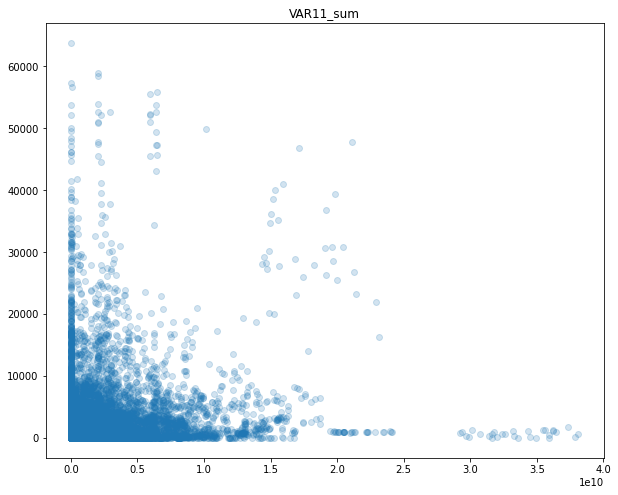

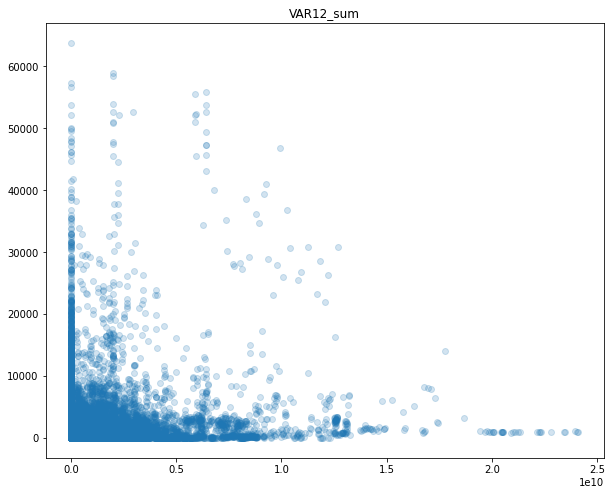

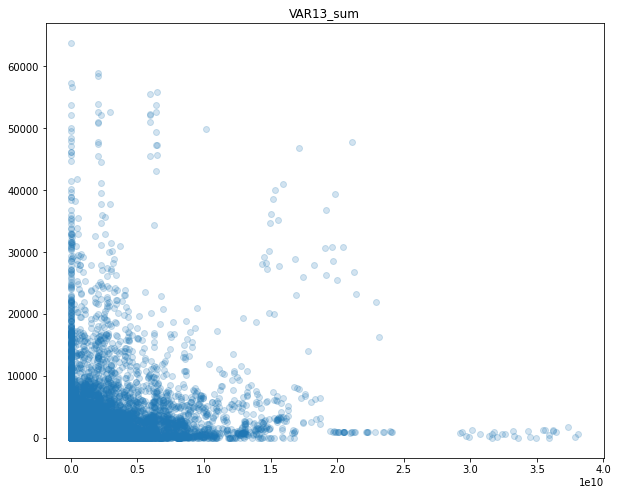

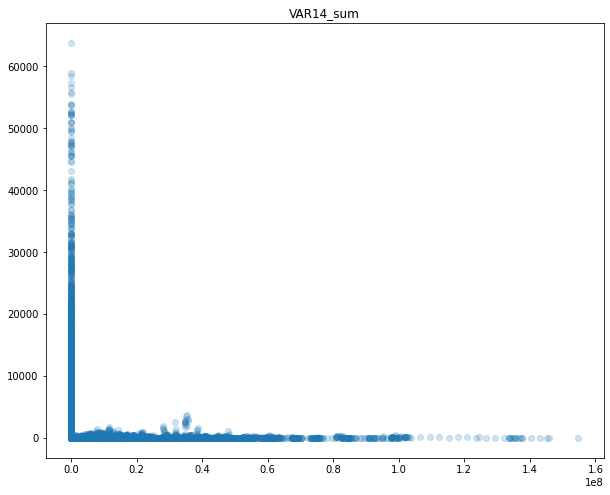

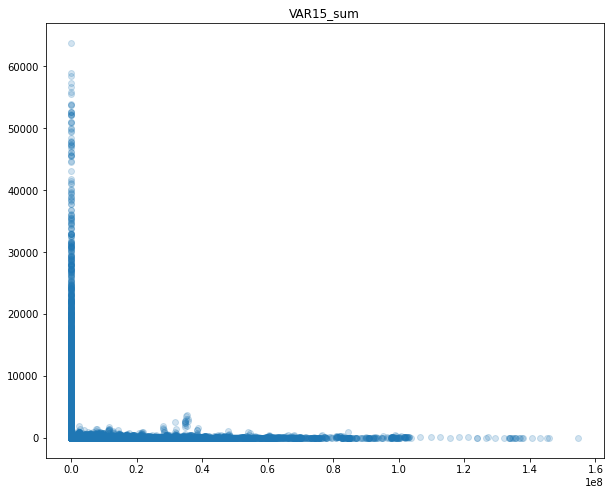

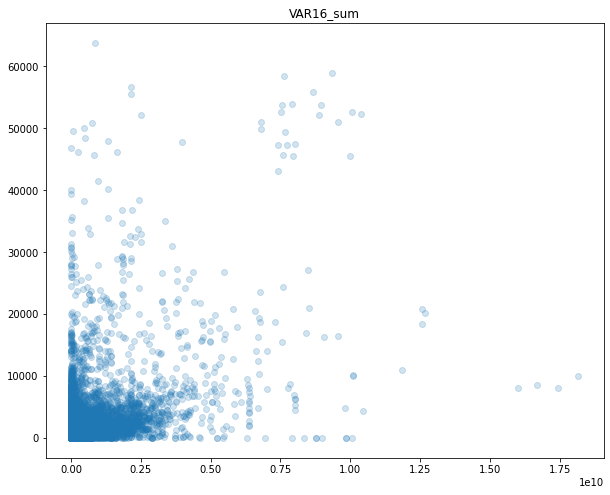

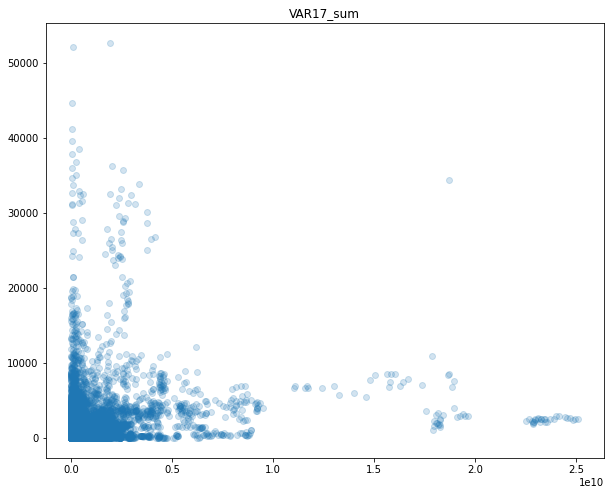

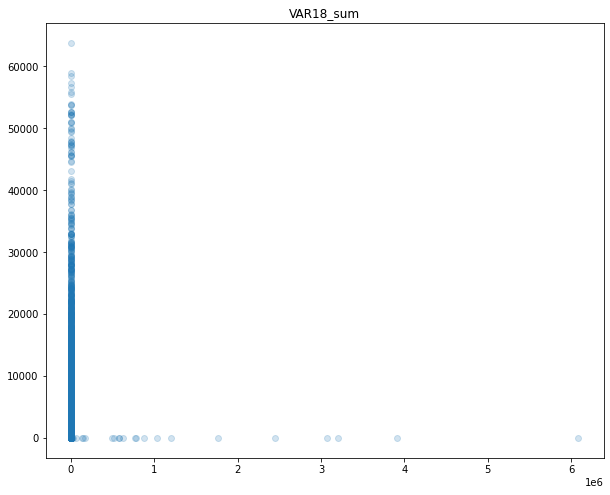

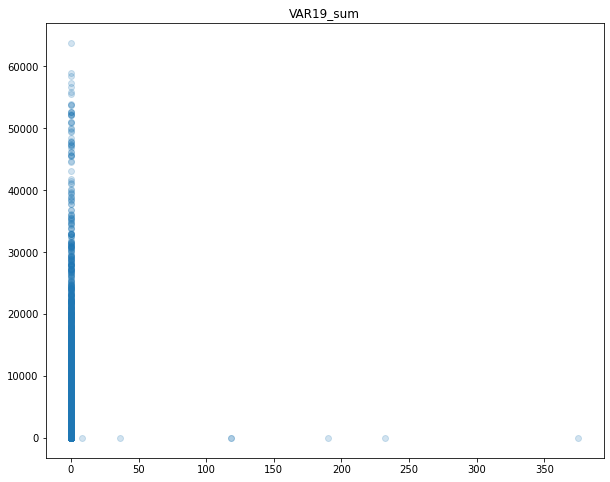

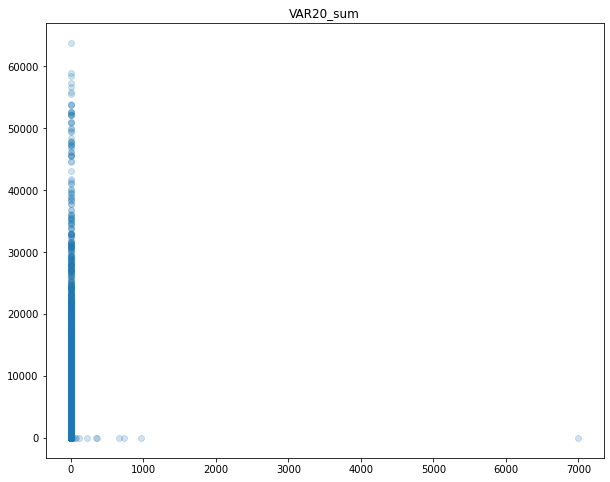

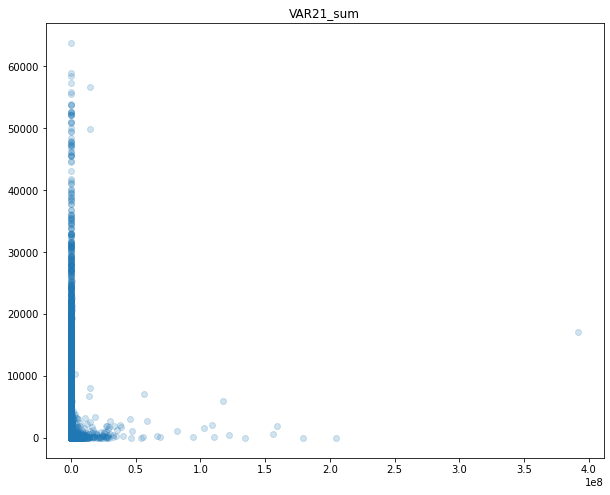

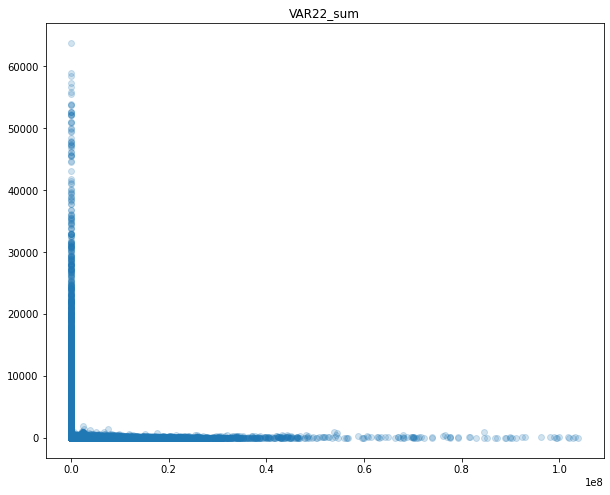

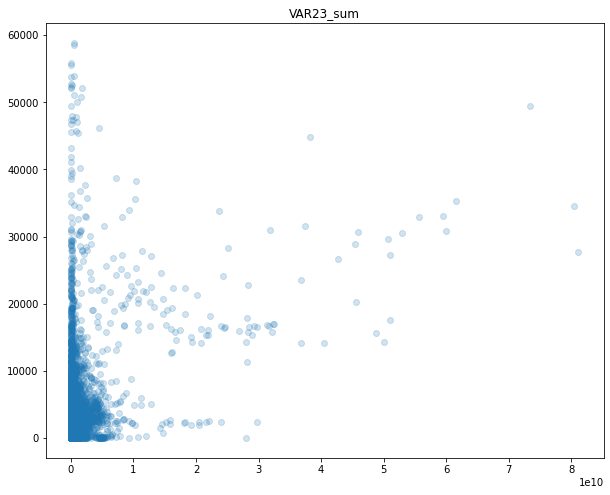

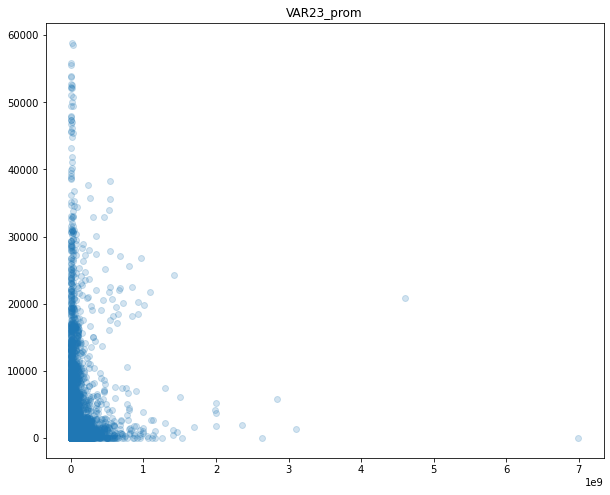

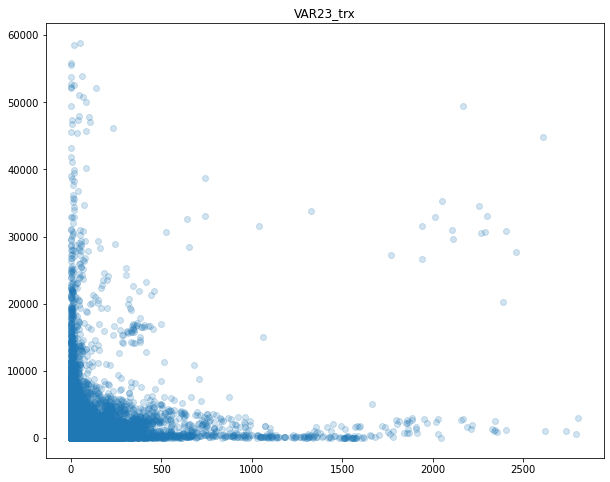

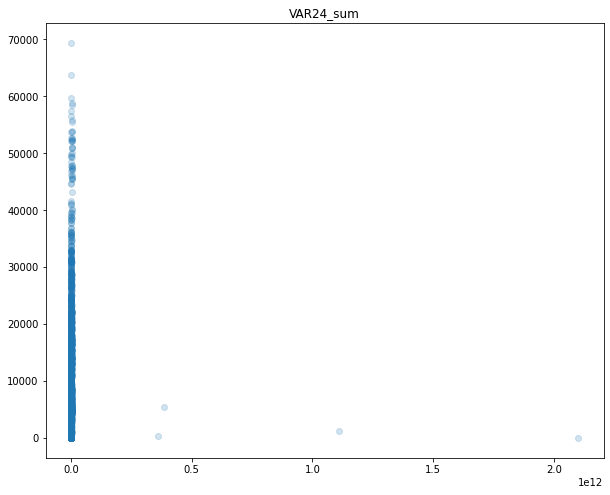

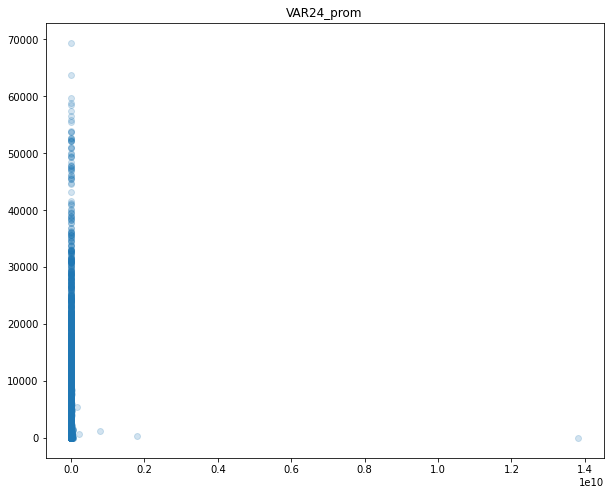

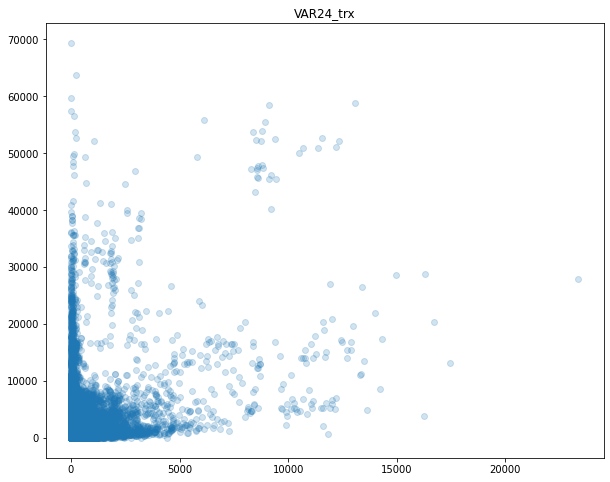

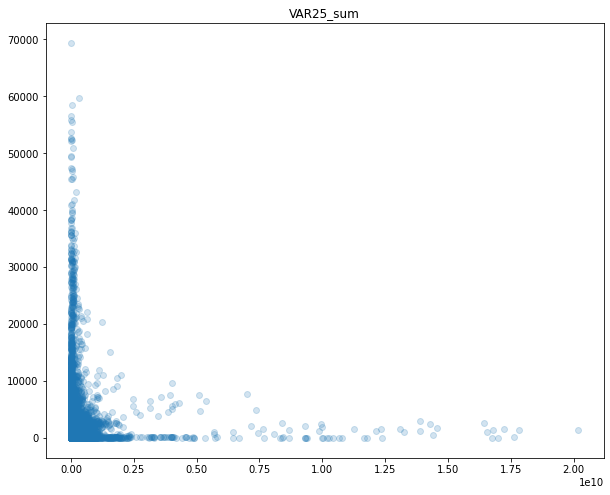

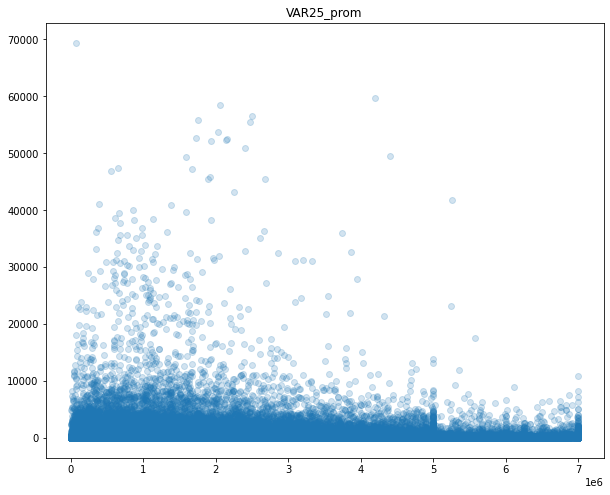

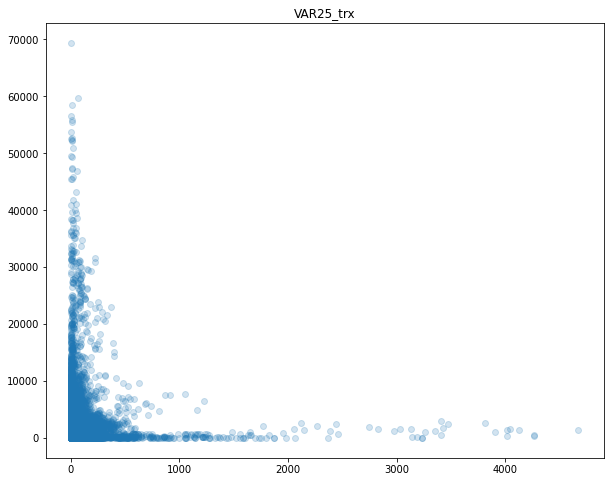

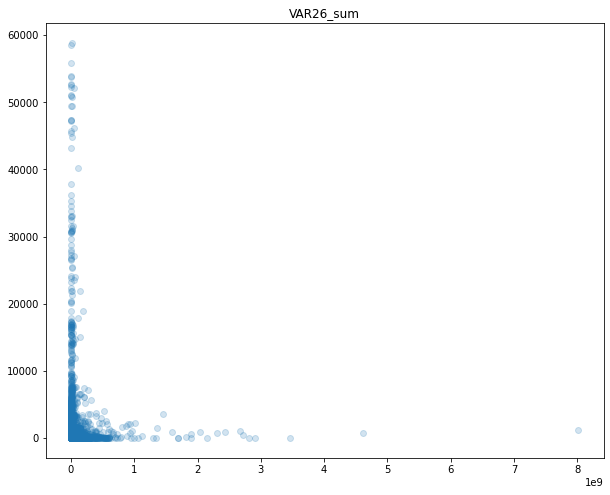

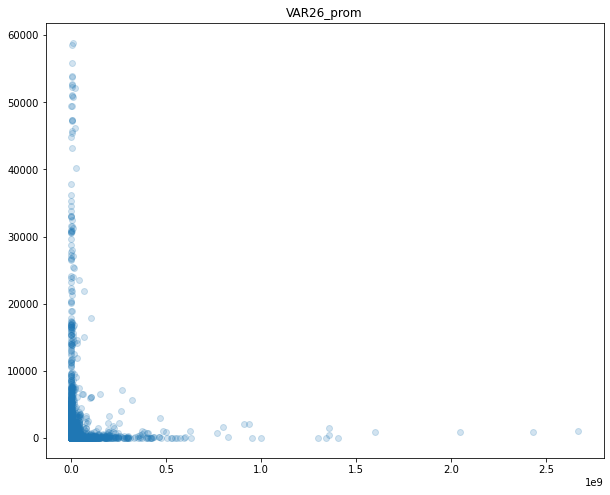

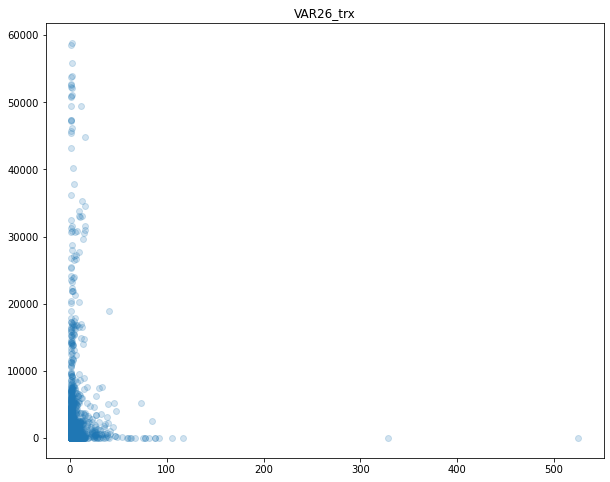

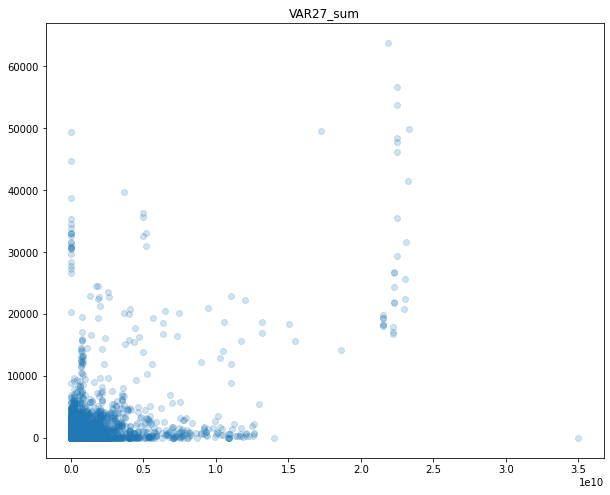

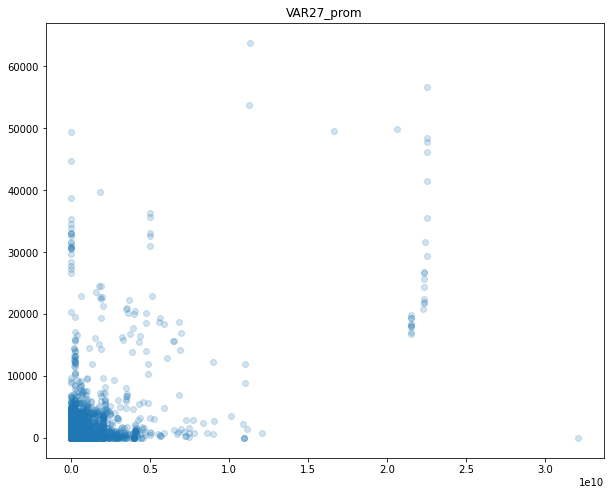

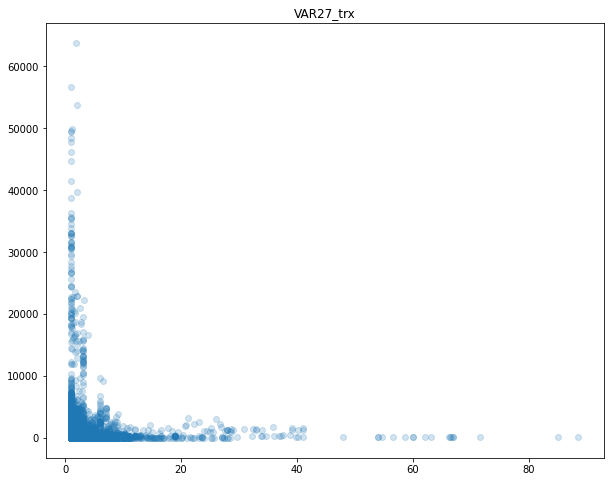

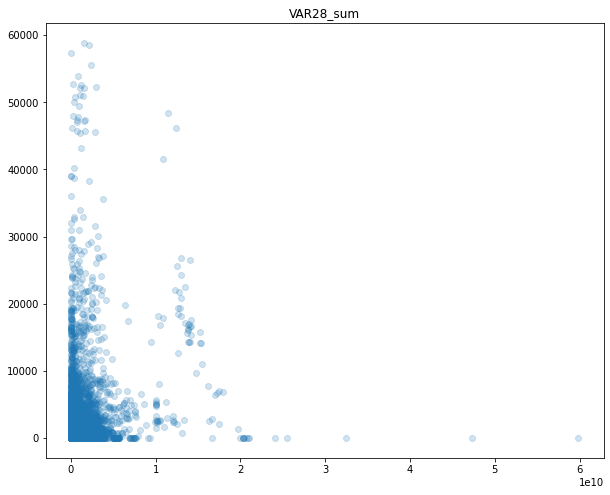

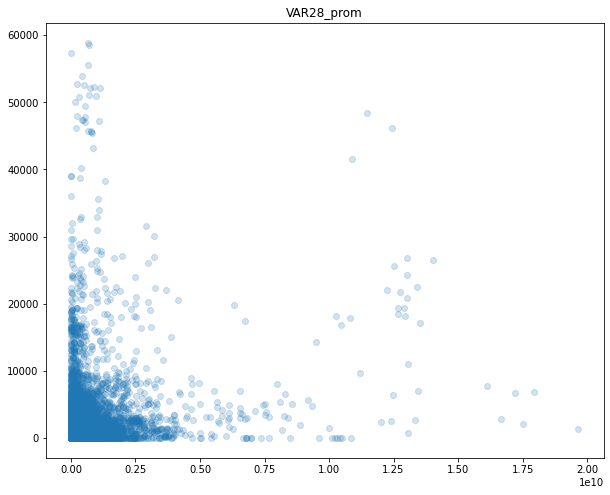

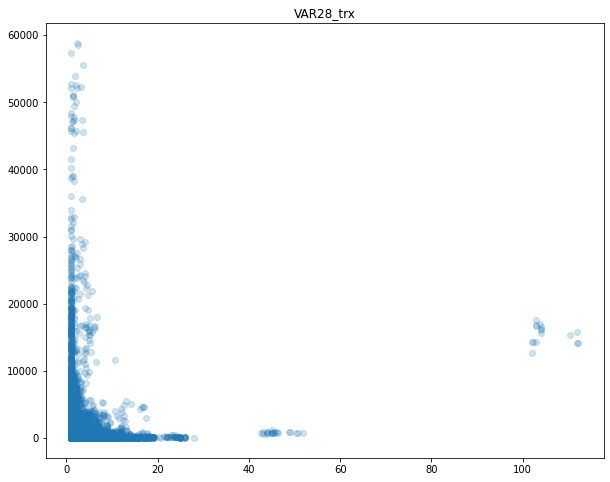

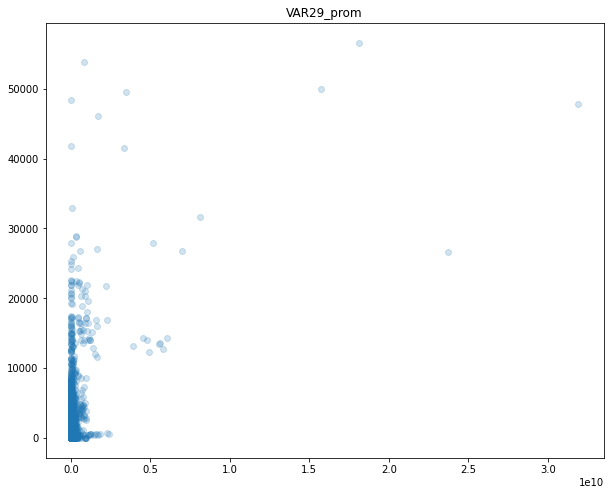

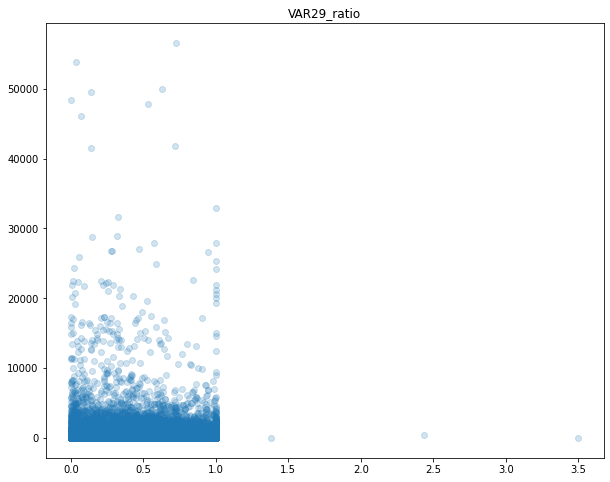

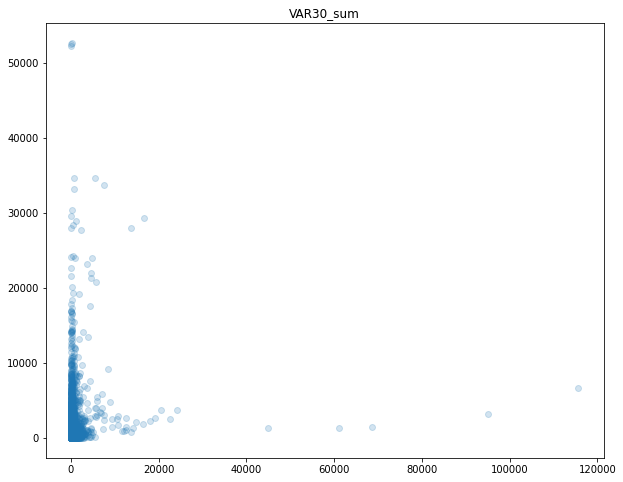

In [18]:
def scatter_check(df, variable, figsize = (10,8)):
    plt.figure(figsize=figsize)
    plt.scatter(df[variable], train_df.target_mes, alpha = 0.2)
    #plt.xlim([0,0.2e9])
    plt.title(variable)
    return plt.show()

for col in train_df.filter(like = 'VAR').columns:
    scatter_check(train_df, col)

In [19]:
train_df.VAR5_trx.value_counts()

1.0       75848
2.0       55055
3.0       40997
4.0       33066
5.0       26670
          ...  
1909.0        1
1222.0        1
769.0         1
1612.0        1
1502.0        1
Name: VAR5_trx, Length: 1467, dtype: int64

In [20]:
train_df.VAR1_trx.value_counts()

1.0       10153
2.0        6968
3.0        5467
4.0        4423
5.0        3885
          ...  
4711.0        1
7055.0        1
8034.0        1
7314.0        1
3130.0        1
Name: VAR1_trx, Length: 4330, dtype: int64

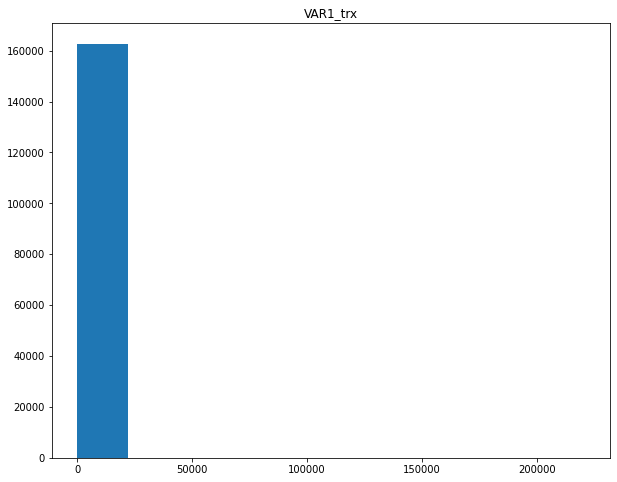

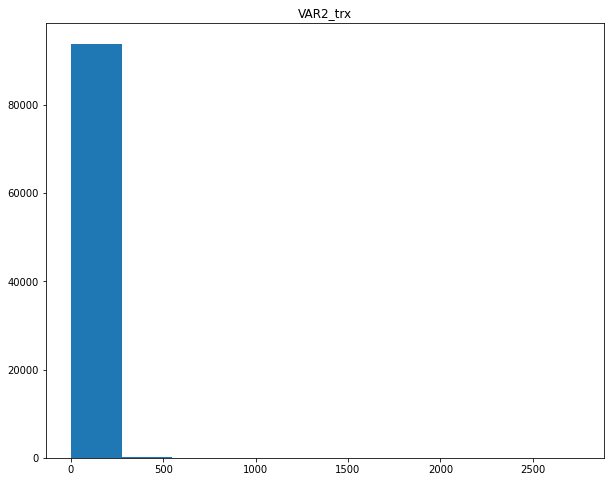

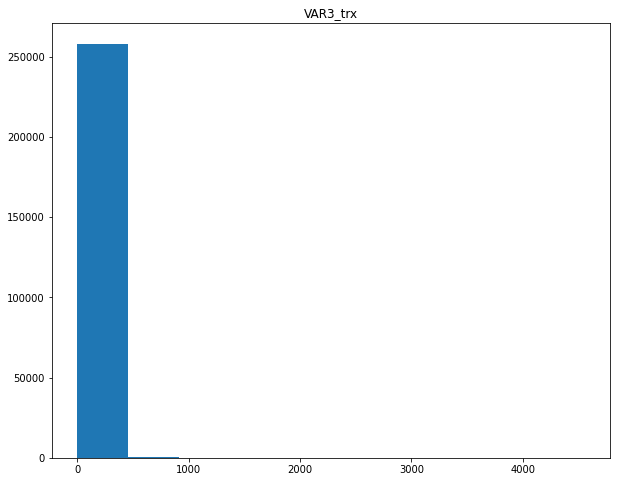

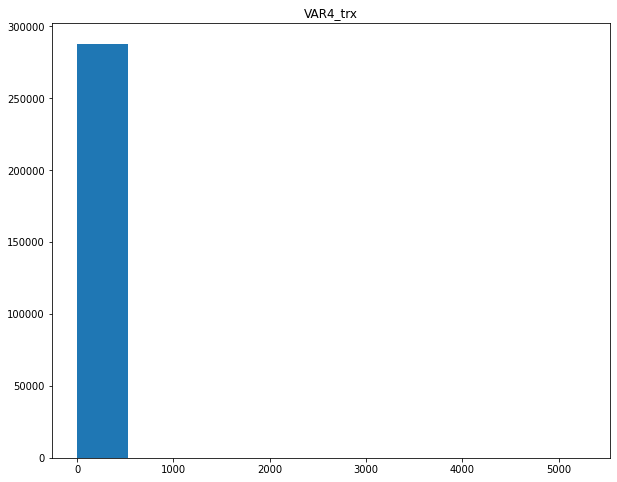

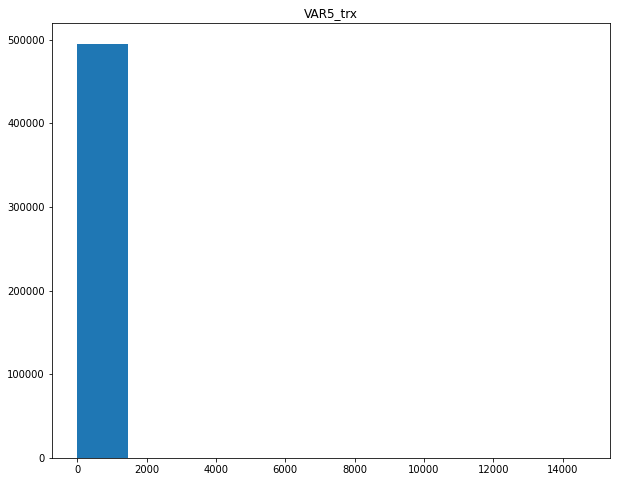

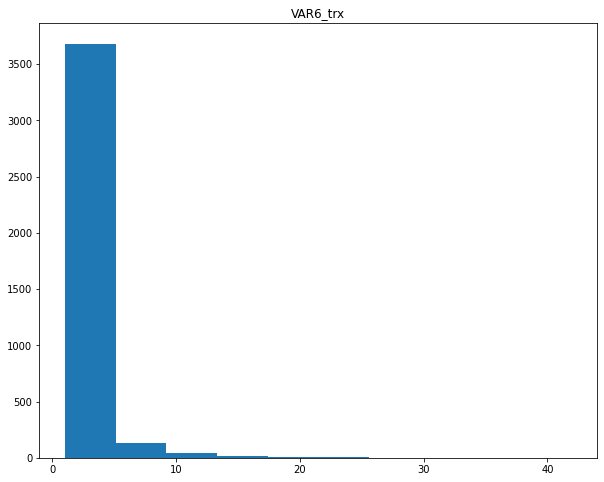

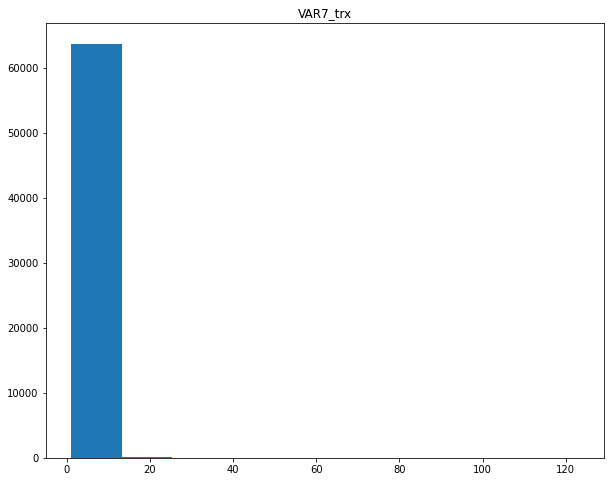

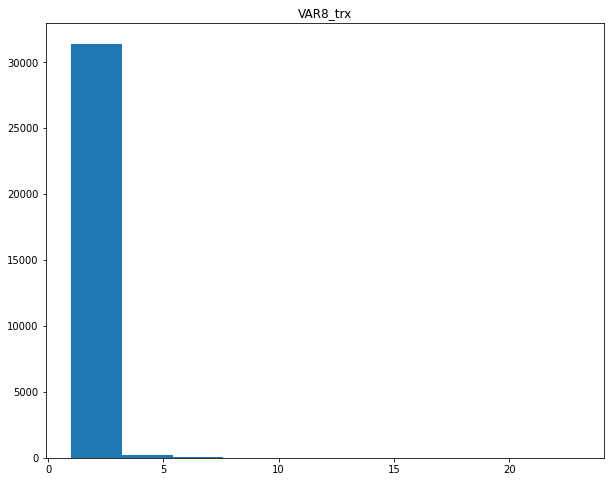

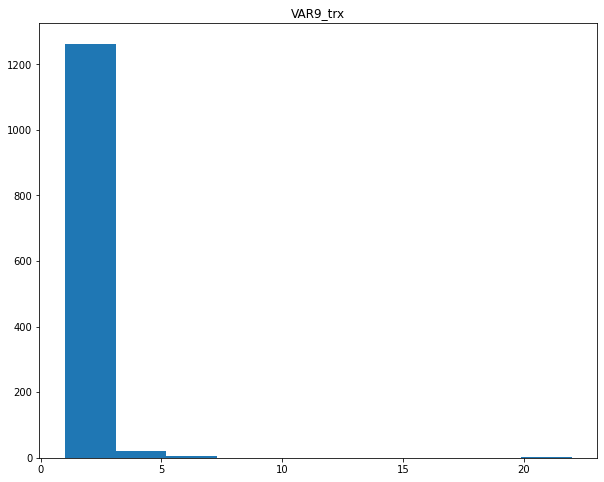

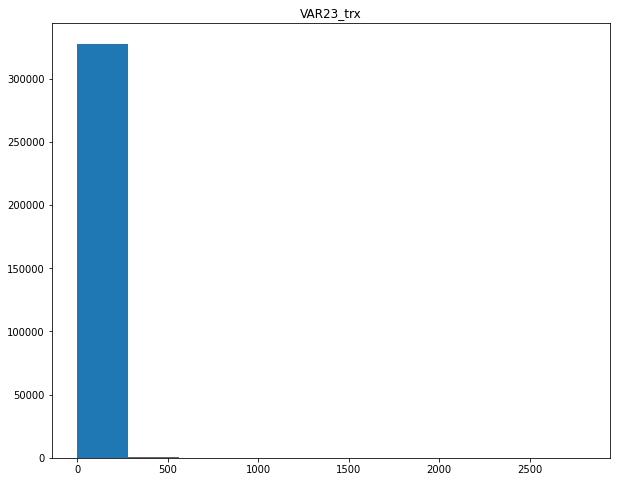

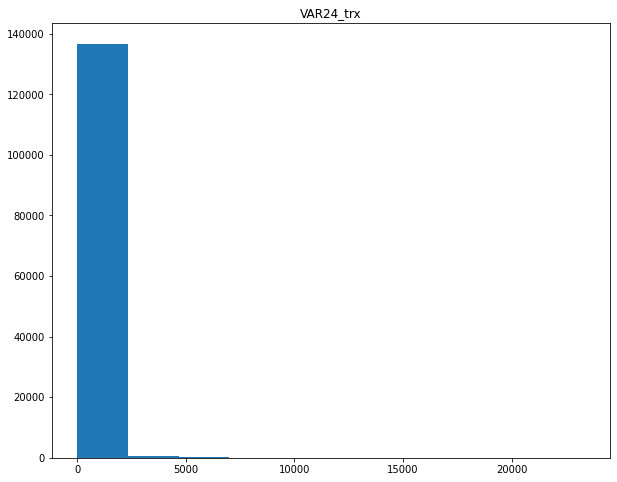

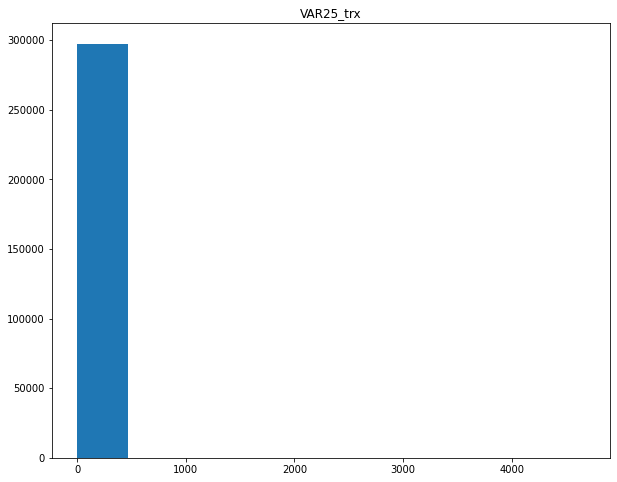

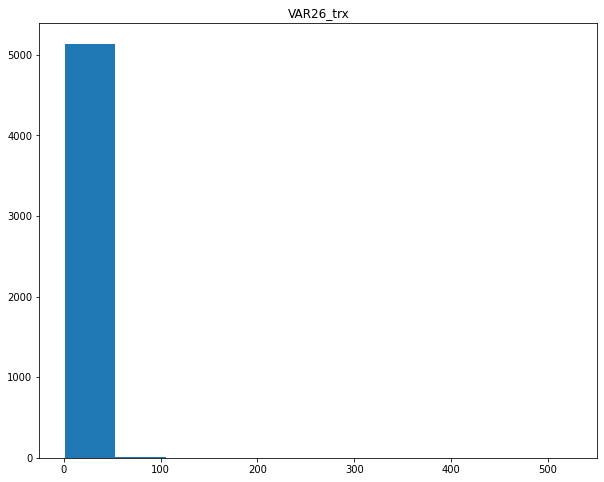

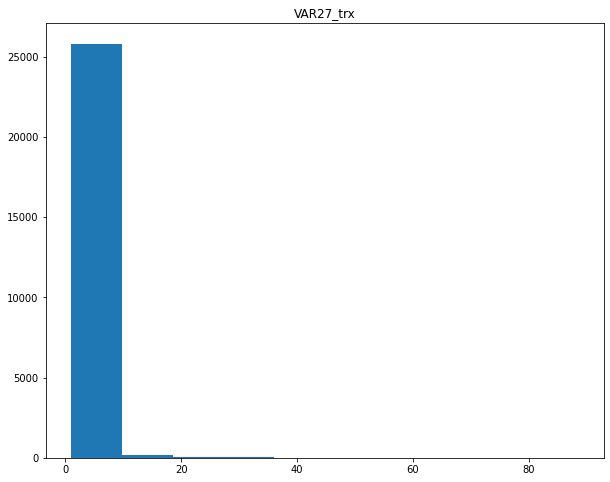

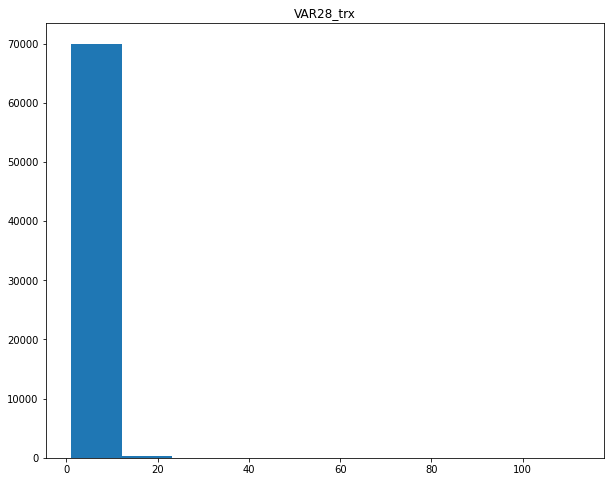

In [21]:
def check_hist(df, variable, figsize = (10,8)):
    plt.figure(figsize=figsize)
    plt.hist(df[variable])
    plt.title(variable)
    plt.show()
    
for col in train_df.filter(like = '_trx').columns:
    check_hist(train_df, col)

In [30]:
train_df.columns

Index(['mes', 'tipo_ban', 'tipo_seg', 'categoria', 'tipo_com', 'tipo_cat',
       'tipo_cli', 'VAR1_sum', 'VAR1_prom', 'VAR1_trx', 'VAR2_sum',
       'VAR2_prom', 'VAR2_trx', 'VAR3_sum', 'VAR3_prom', 'VAR3_trx',
       'VAR4_sum', 'VAR4_prom', 'VAR4_trx', 'VAR5_sum', 'VAR5_prom',
       'VAR5_trx', 'VAR6_sum', 'VAR6_prom', 'VAR6_trx', 'VAR7_sum',
       'VAR7_prom', 'VAR7_trx', 'VAR8_sum', 'VAR8_prom', 'VAR8_trx',
       'VAR9_sum', 'VAR9_prom', 'VAR9_trx', 'VAR10_sum', 'VAR11_sum',
       'VAR12_sum', 'VAR13_sum', 'VAR14_sum', 'VAR15_sum', 'VAR16_sum',
       'VAR17_sum', 'VAR18_sum', 'VAR19_sum', 'VAR20_sum', 'VAR21_sum',
       'VAR22_sum', 'VAR23_sum', 'VAR23_prom', 'VAR23_trx', 'VAR24_sum',
       'VAR24_prom', 'VAR24_trx', 'VAR25_sum', 'VAR25_prom', 'VAR25_trx',
       'VAR26_sum', 'VAR26_prom', 'VAR26_trx', 'VAR27_sum', 'VAR27_prom',
       'VAR27_trx', 'VAR28_sum', 'VAR28_prom', 'VAR28_trx', 'VAR29_prom',
       'VAR29_ratio', 'VAR30_sum', 'target_mes', 'periodo_mes', 'year',
 

In [31]:
target = ['target_mes']
cat_vars = ['mes','tipo_ban','tipo_seg','categoria','tipo_com','tipo_cat','tipo_cli','month','year']
int_variables = train_df.filter(like = '_trx').columns.tolist()
float_variables = [vars for vars in train_df.columns if vars not in int_variables + cat_vars + target]
train_ids = set(train_df.index)
test_ids = set(test_df.index)

In [38]:
float_variables + int_variables

['VAR1_sum',
 'VAR1_prom',
 'VAR2_sum',
 'VAR2_prom',
 'VAR3_sum',
 'VAR3_prom',
 'VAR4_sum',
 'VAR4_prom',
 'VAR5_sum',
 'VAR5_prom',
 'VAR6_sum',
 'VAR6_prom',
 'VAR7_sum',
 'VAR7_prom',
 'VAR8_sum',
 'VAR8_prom',
 'VAR9_sum',
 'VAR9_prom',
 'VAR10_sum',
 'VAR11_sum',
 'VAR12_sum',
 'VAR13_sum',
 'VAR14_sum',
 'VAR15_sum',
 'VAR16_sum',
 'VAR17_sum',
 'VAR18_sum',
 'VAR19_sum',
 'VAR20_sum',
 'VAR21_sum',
 'VAR22_sum',
 'VAR23_sum',
 'VAR23_prom',
 'VAR24_sum',
 'VAR24_prom',
 'VAR25_sum',
 'VAR25_prom',
 'VAR26_sum',
 'VAR26_prom',
 'VAR27_sum',
 'VAR27_prom',
 'VAR28_sum',
 'VAR28_prom',
 'VAR29_prom',
 'VAR29_ratio',
 'VAR30_sum',
 'periodo_mes',
 'VAR1_trx',
 'VAR2_trx',
 'VAR3_trx',
 'VAR4_trx',
 'VAR5_trx',
 'VAR6_trx',
 'VAR7_trx',
 'VAR8_trx',
 'VAR9_trx',
 'VAR23_trx',
 'VAR24_trx',
 'VAR25_trx',
 'VAR26_trx',
 'VAR27_trx',
 'VAR28_trx']

In [28]:
print(f'Número de Ids que están en train, pero no en test: {len(train_ids-test_ids)}')
print(f'Número de Ids que están en test, pero no en train: {len(test_ids-train_ids)}')

Número de Ids que están en train, pero no en test: 11288
Número de Ids que están en test, pero no en train: 11226


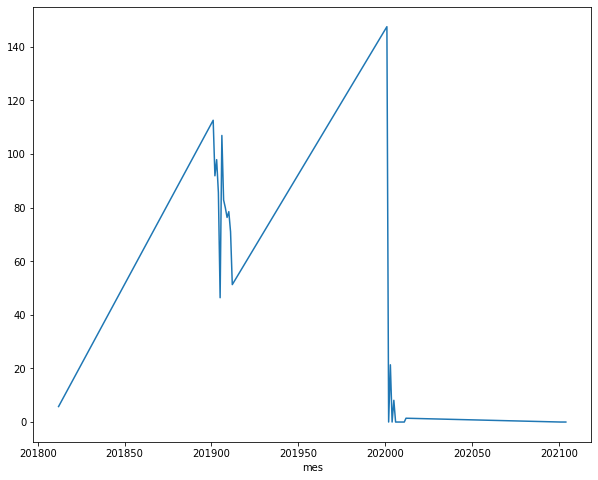

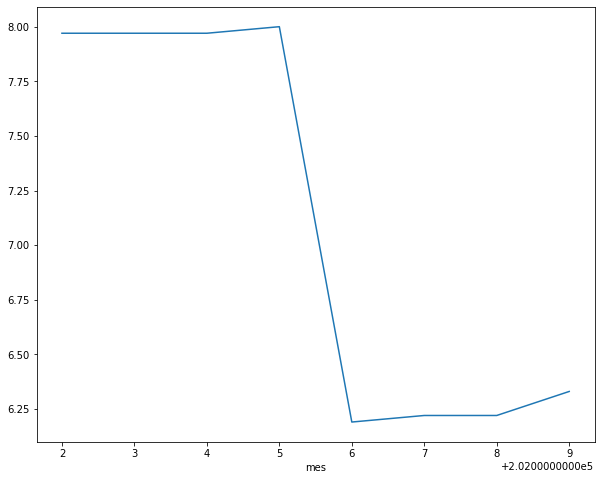

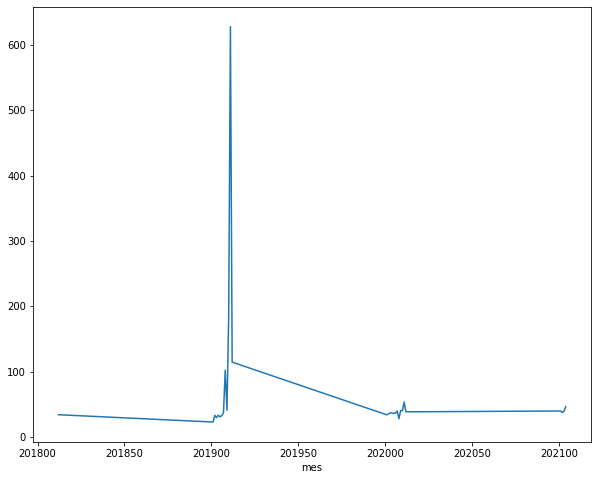

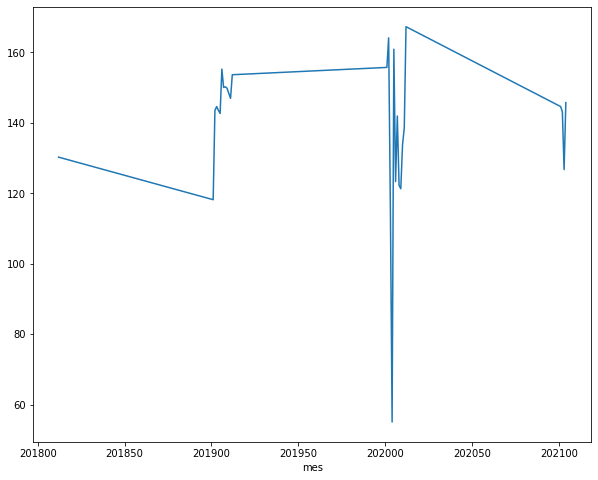

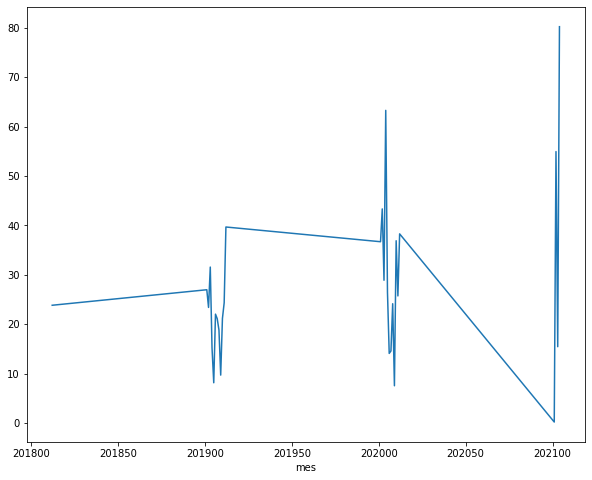

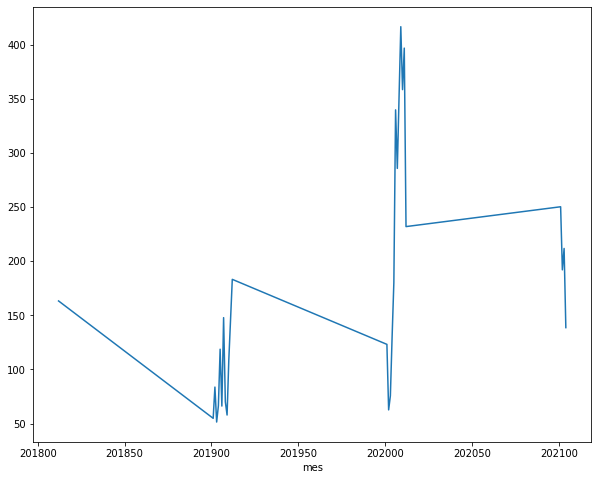

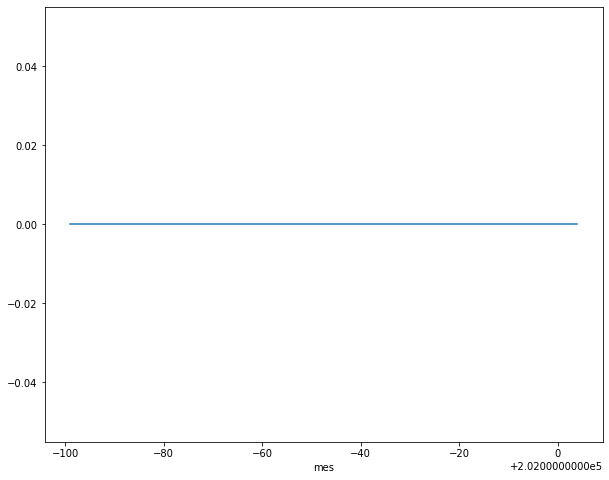

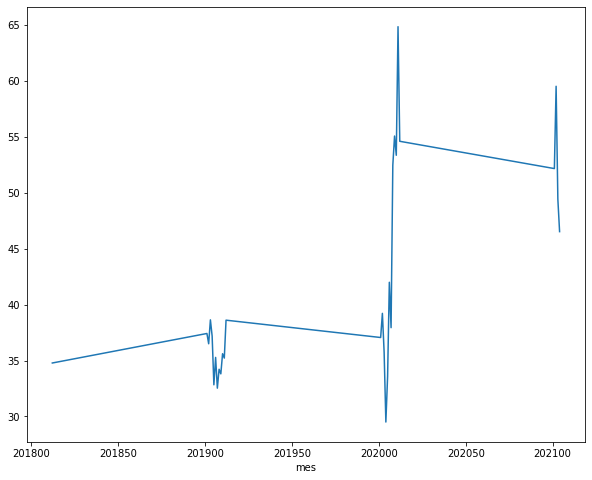

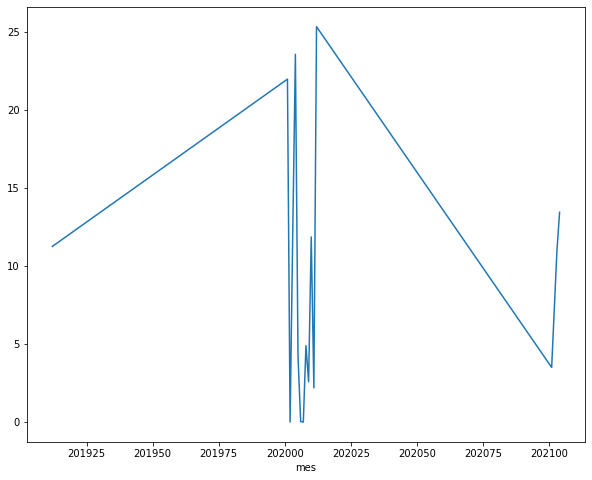

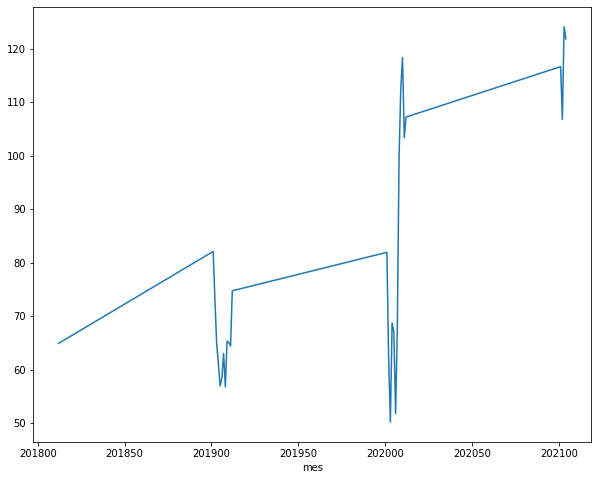

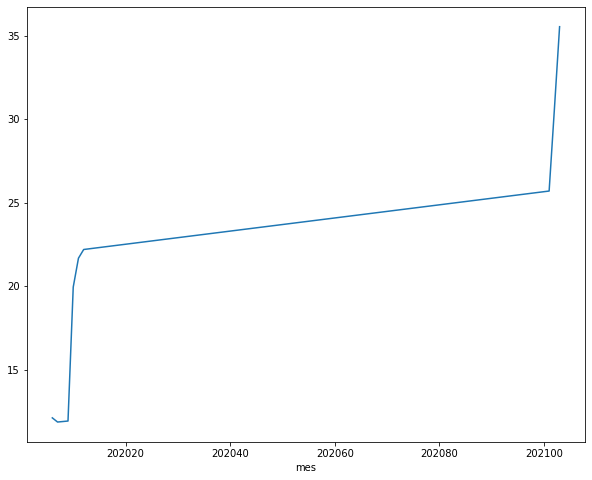

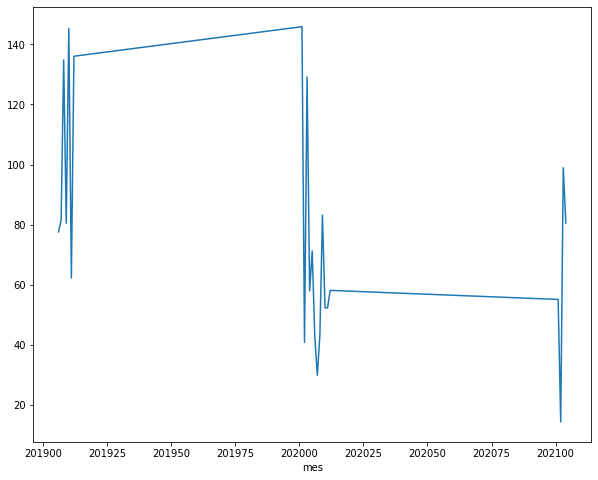

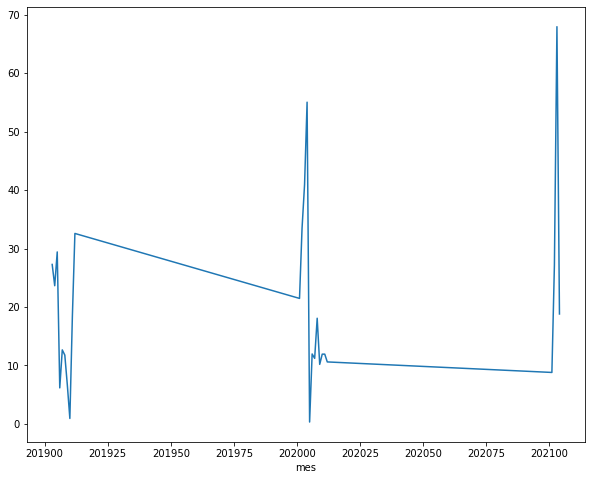

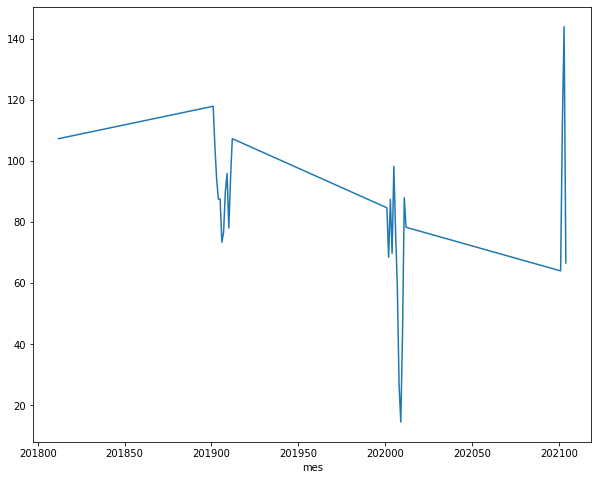

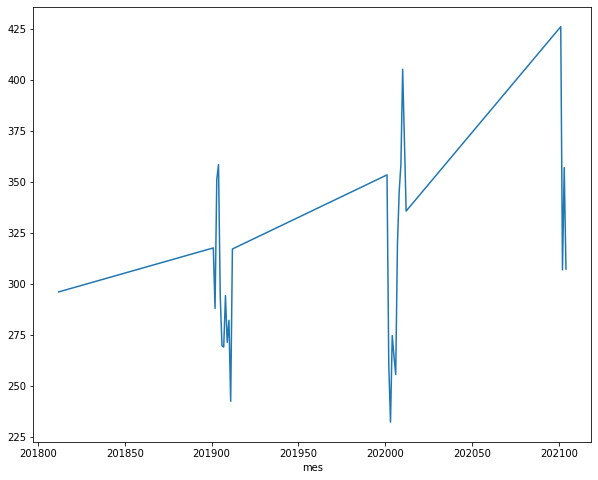

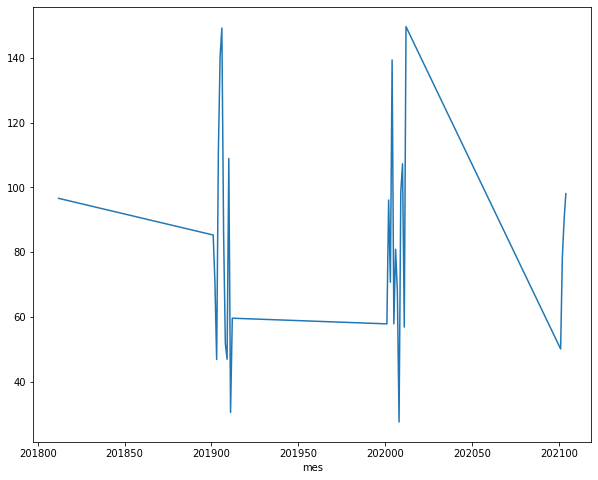

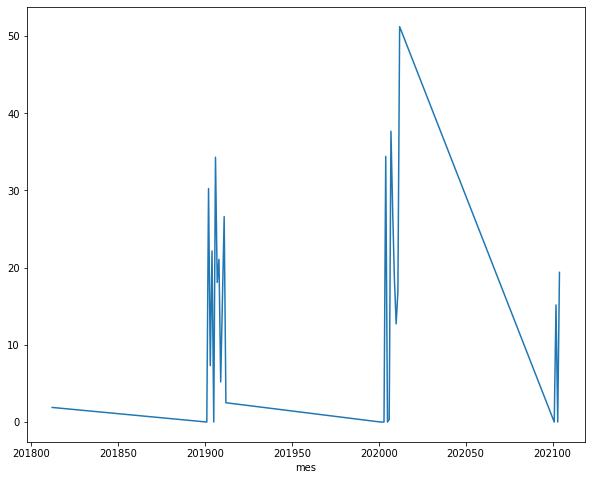

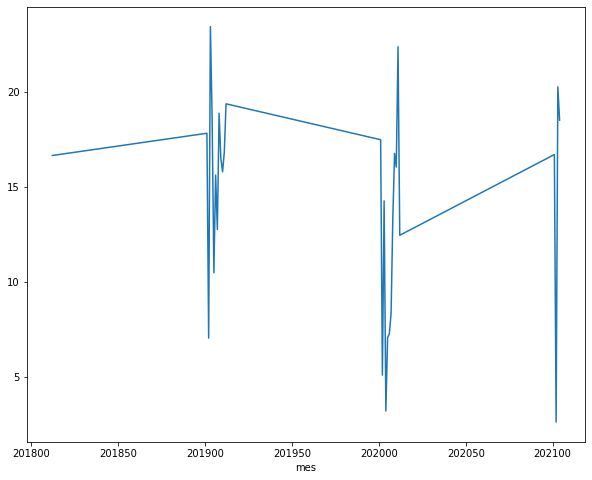

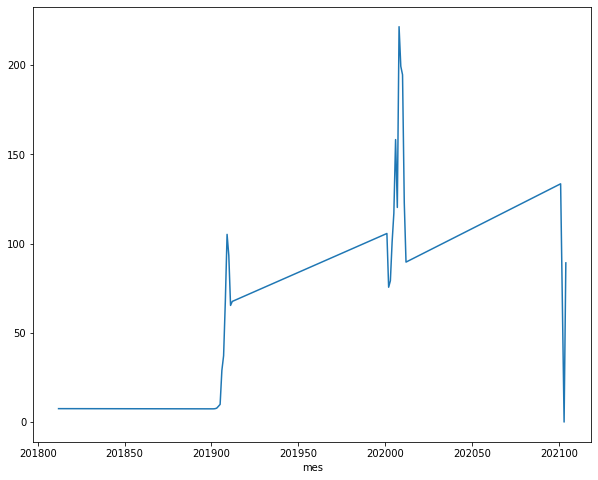

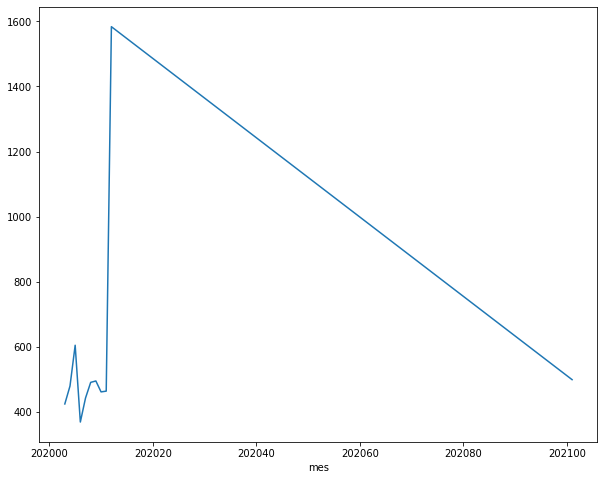

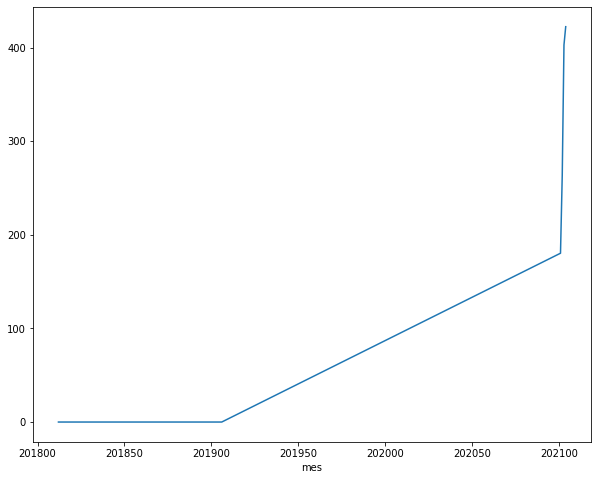

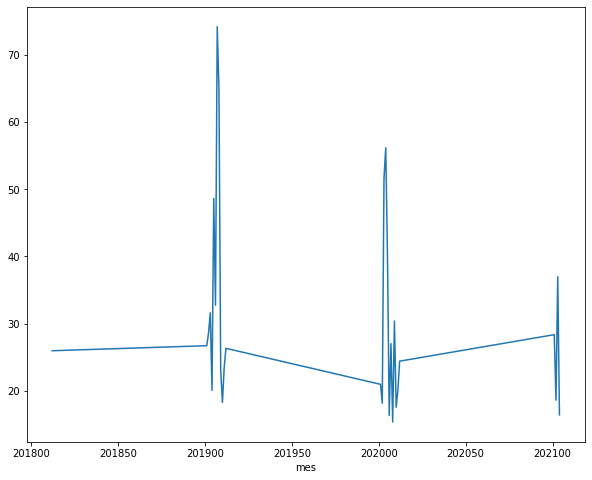

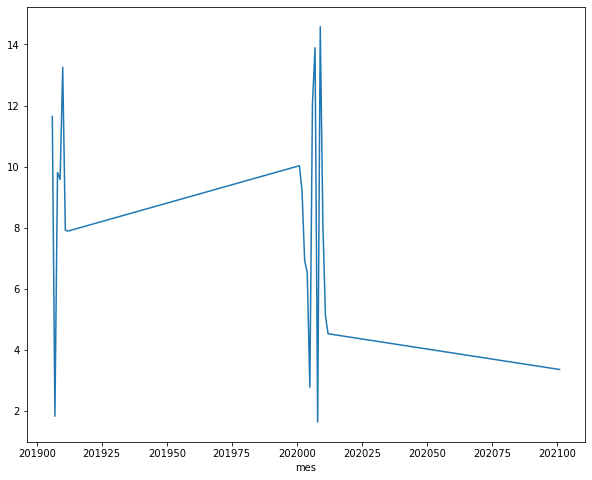

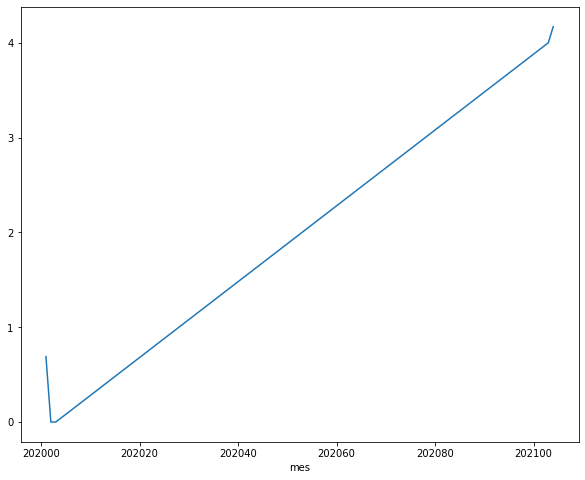

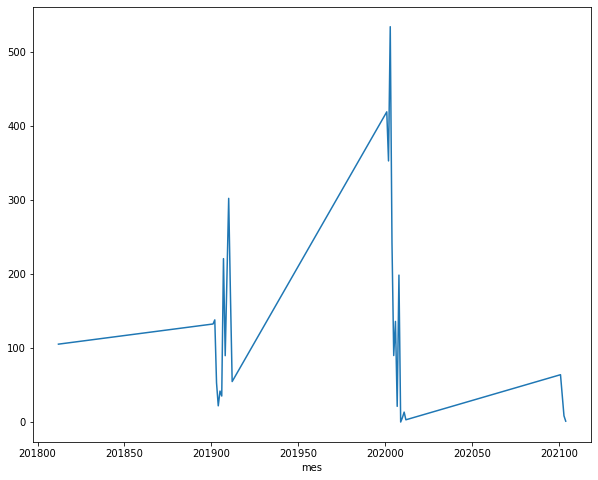

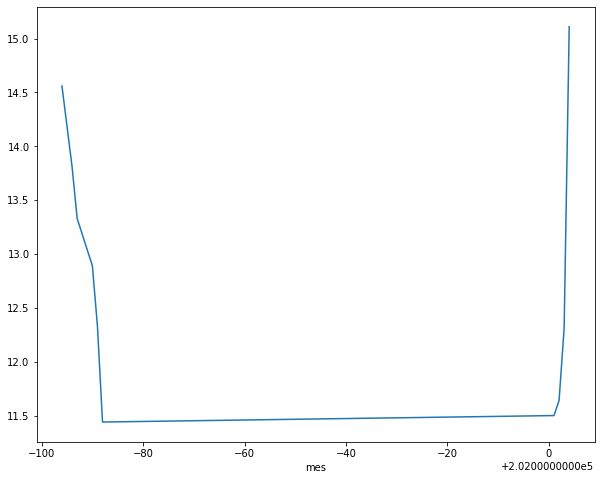

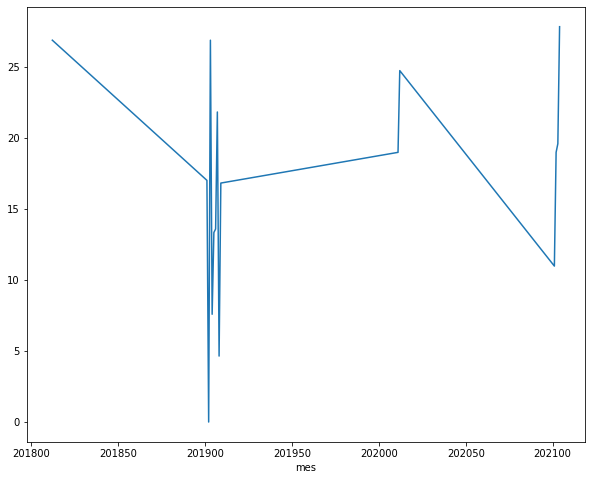

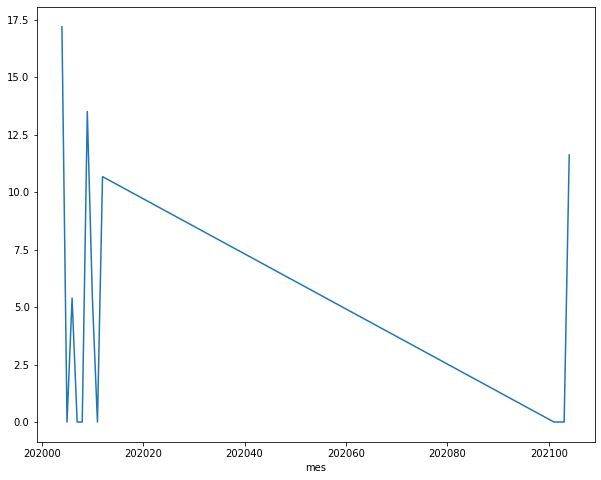

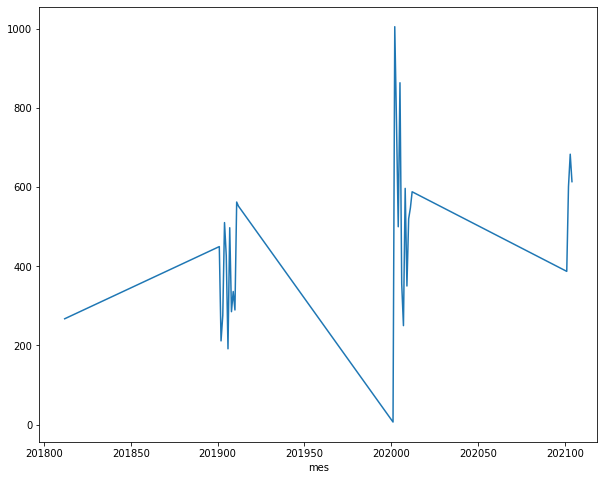

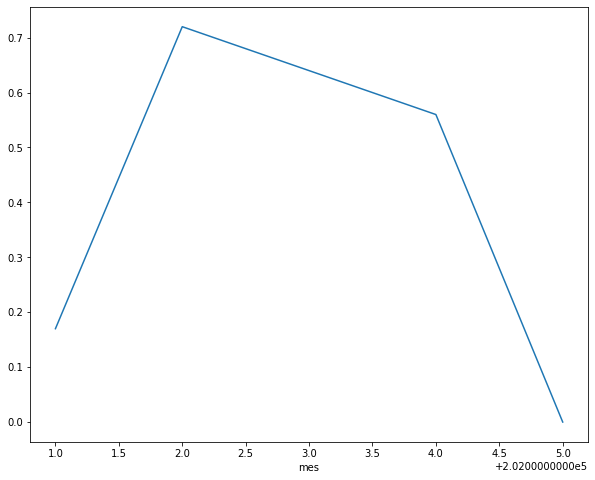

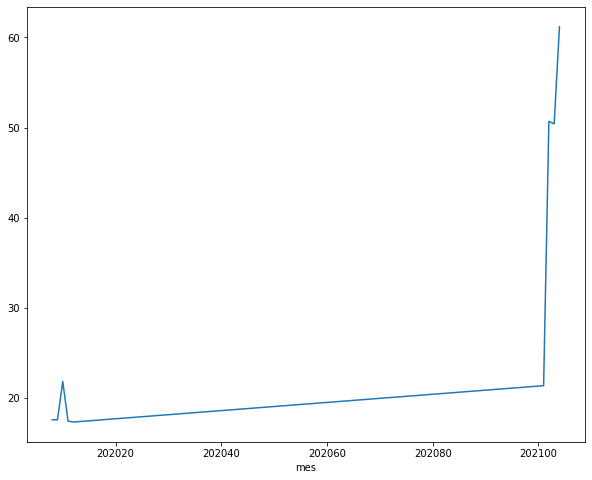

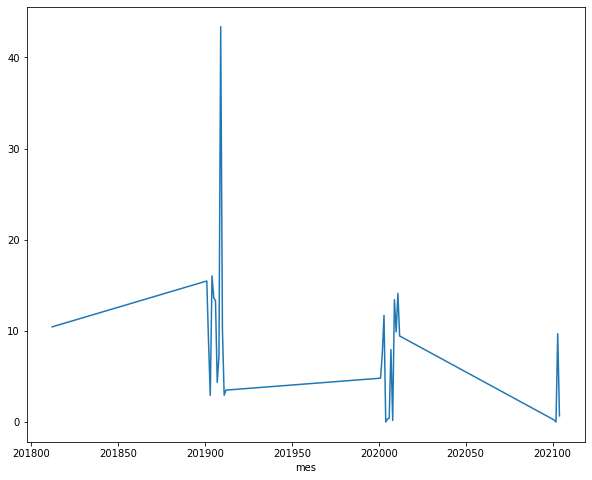

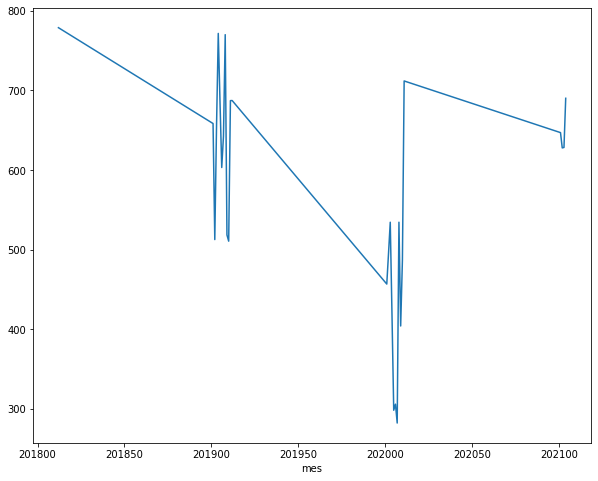

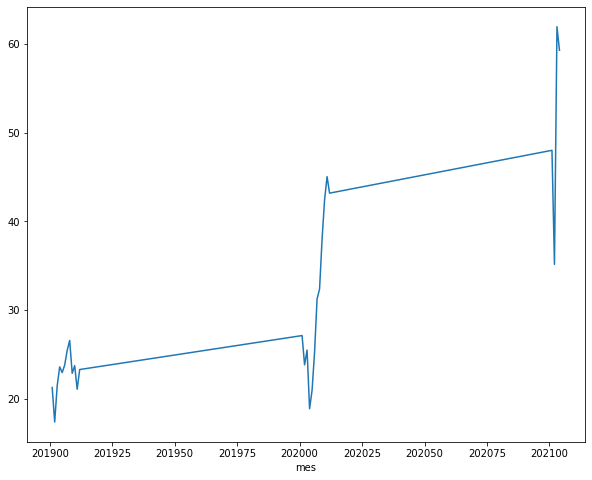

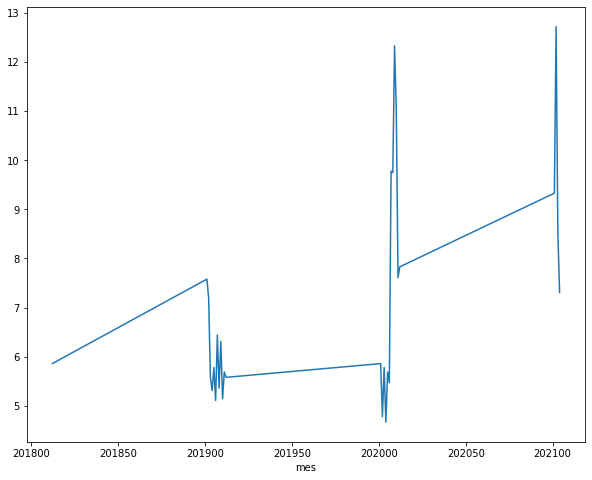

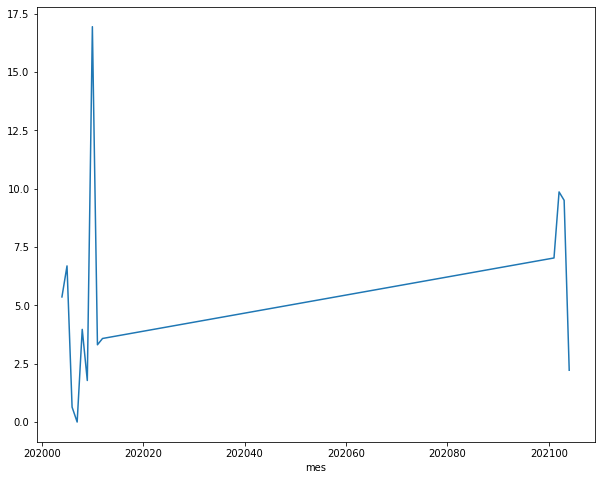

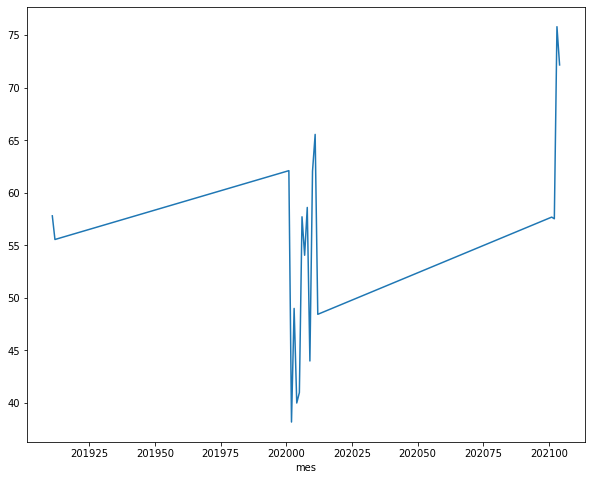

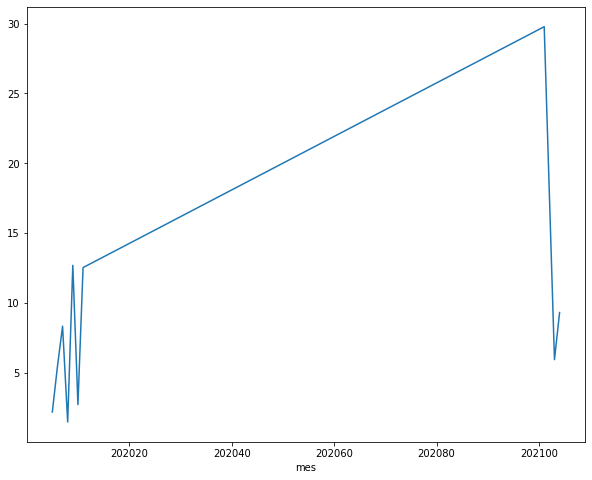

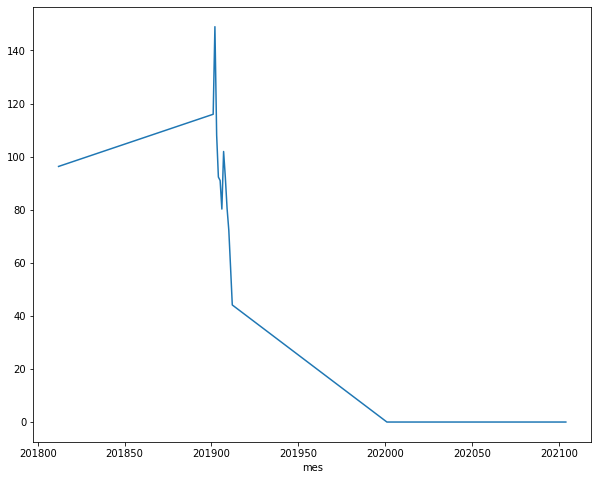

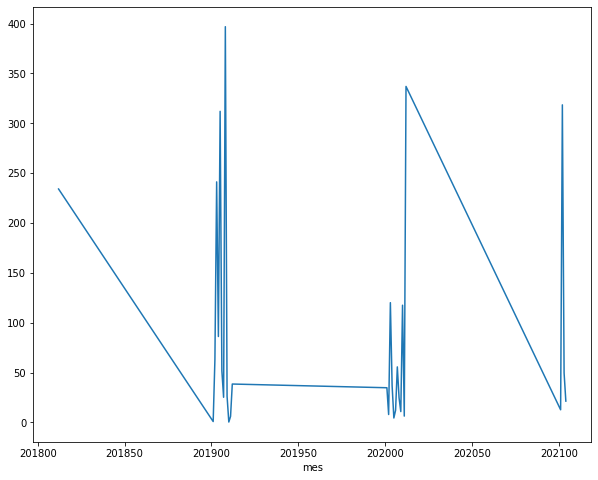

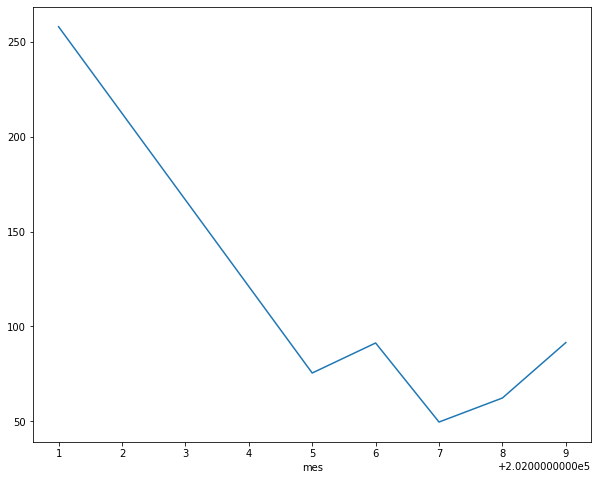

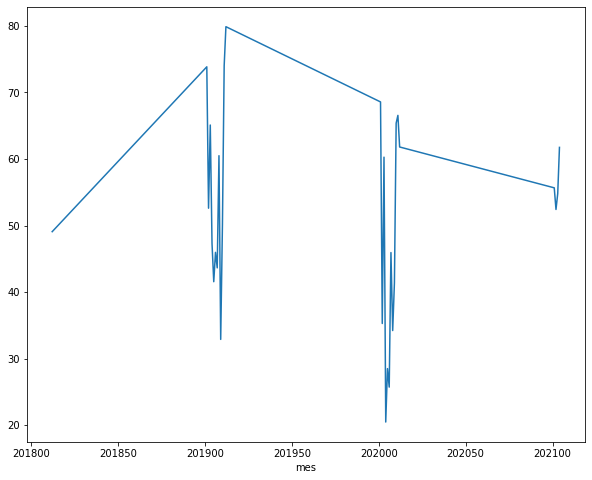

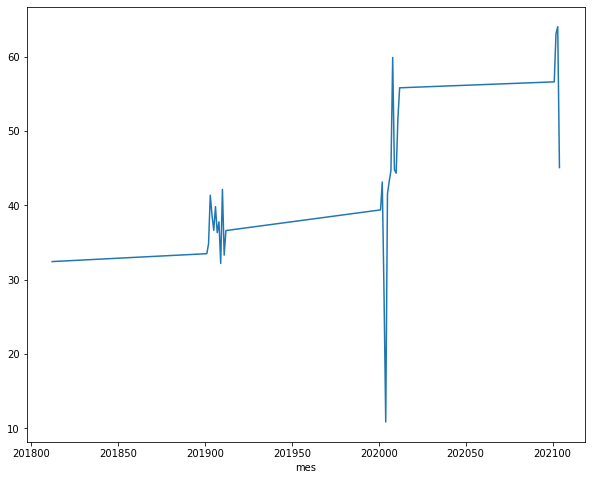

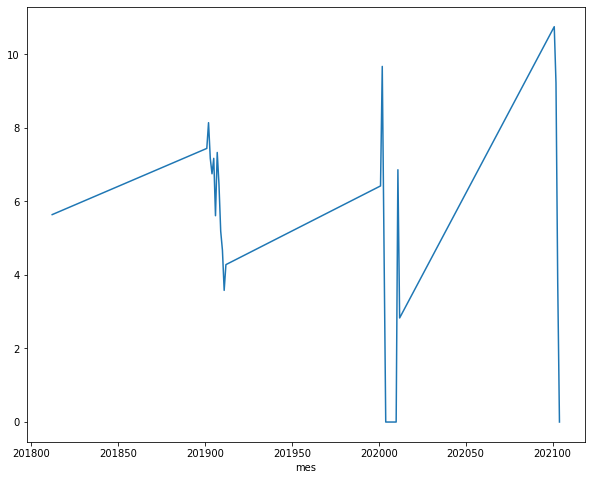

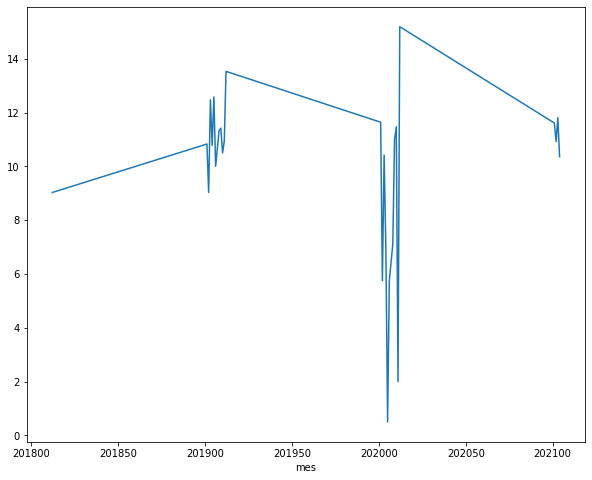

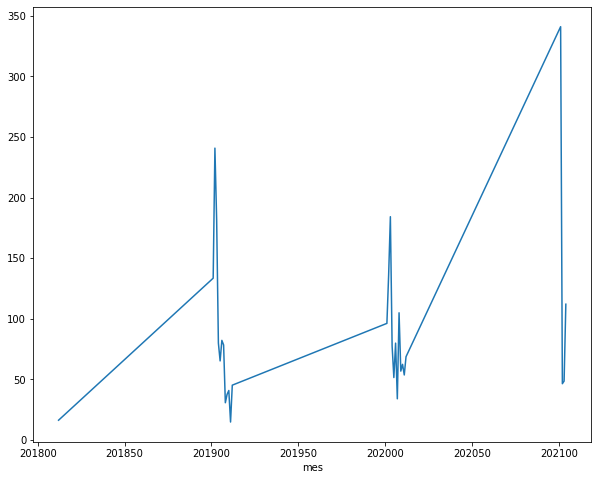

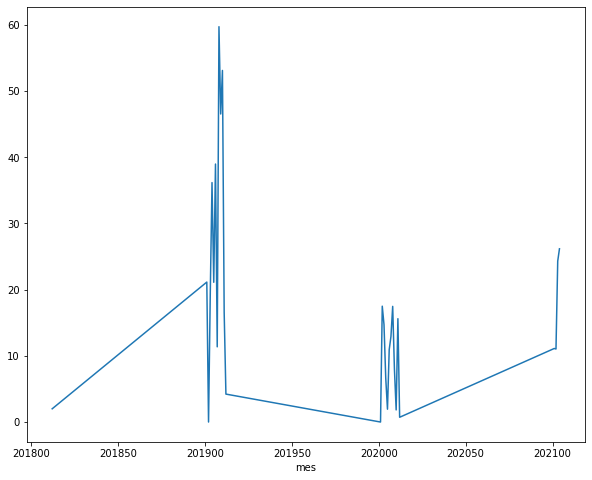

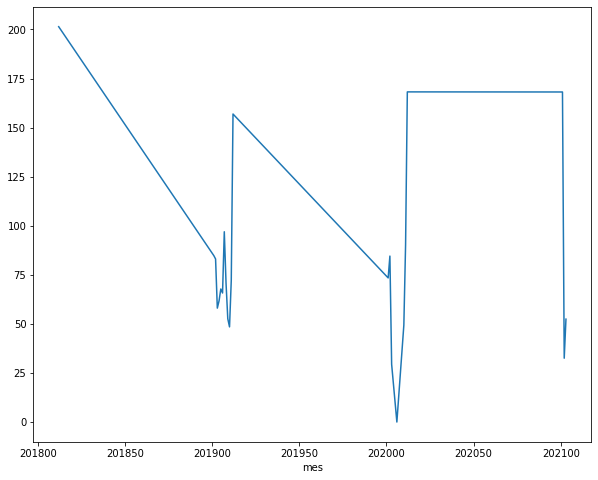

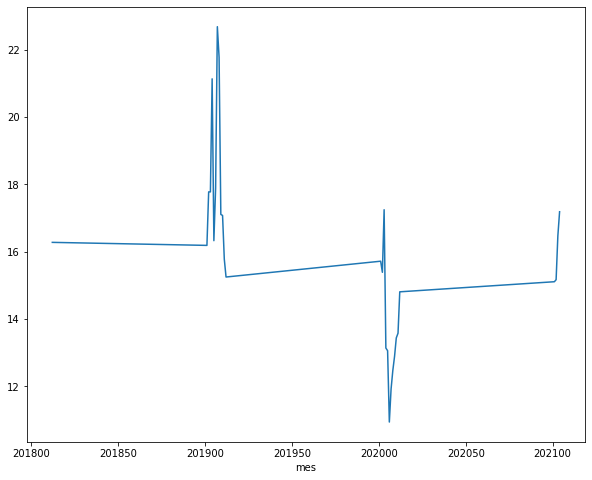

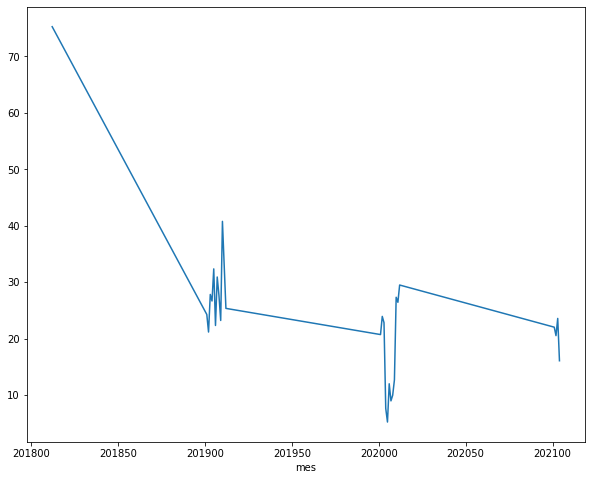

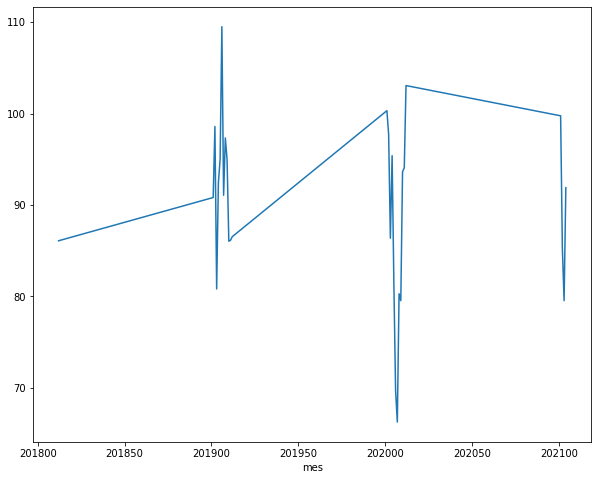

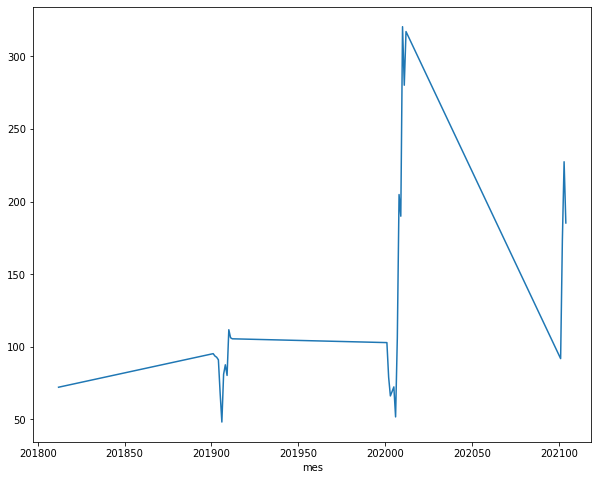

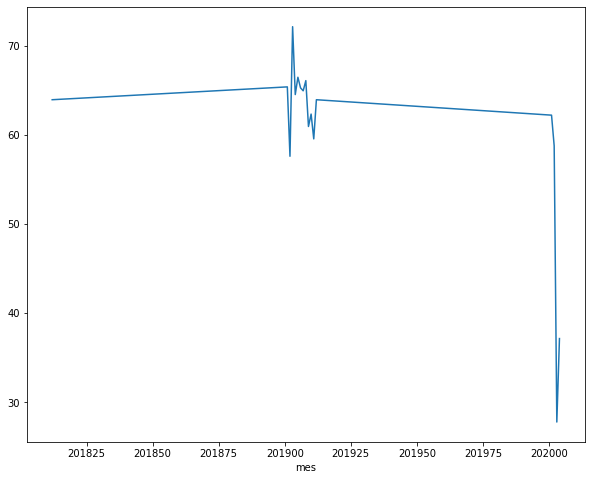

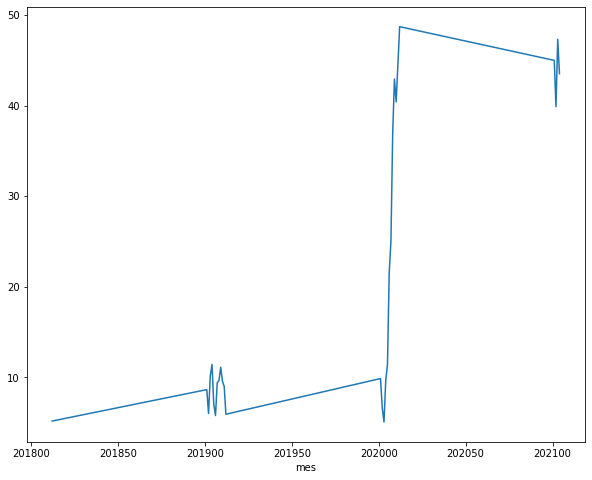

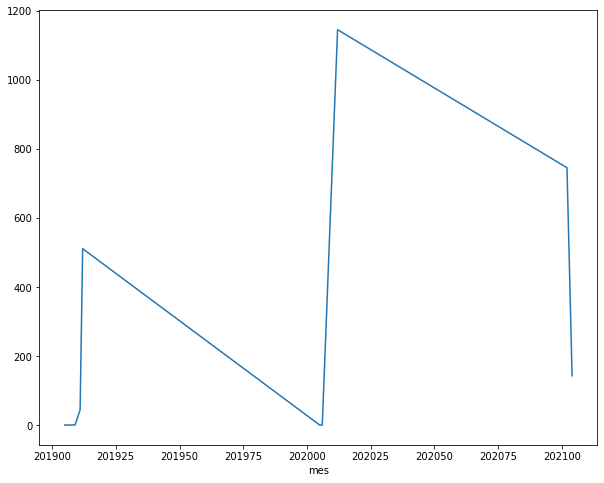

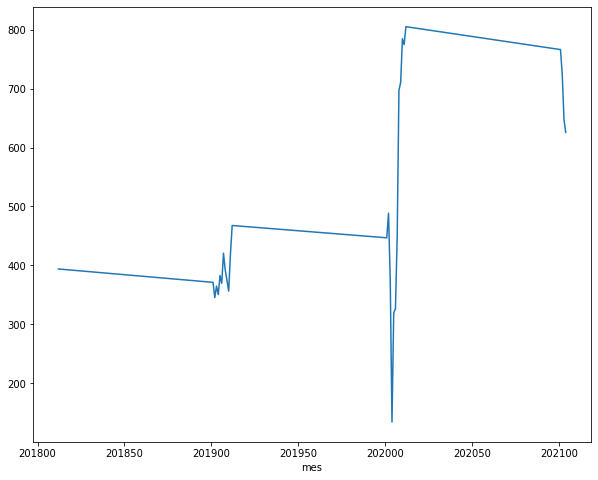

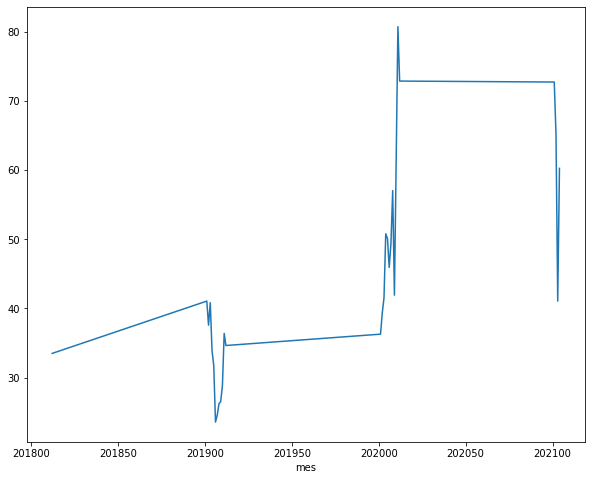

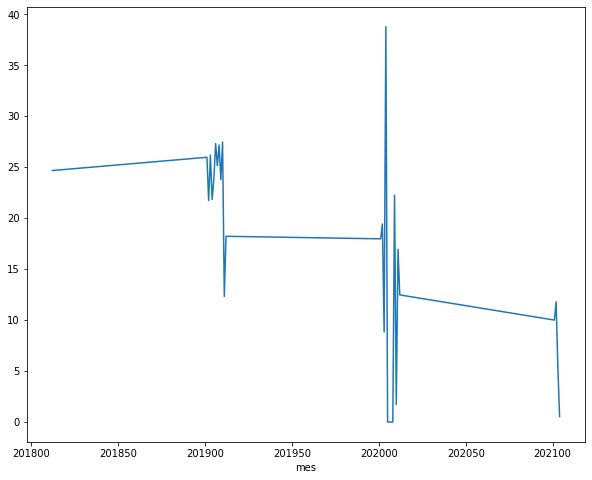

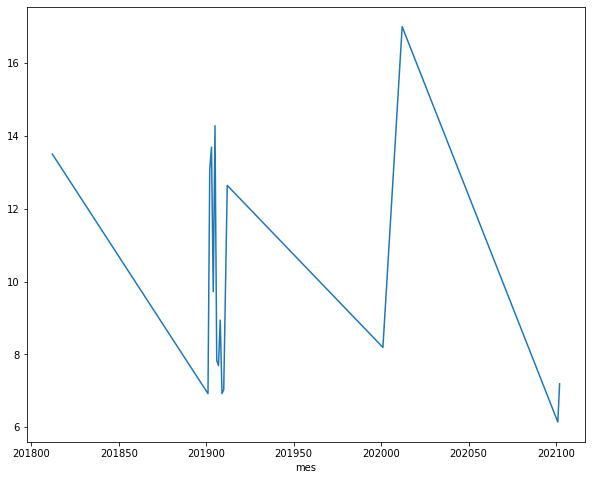

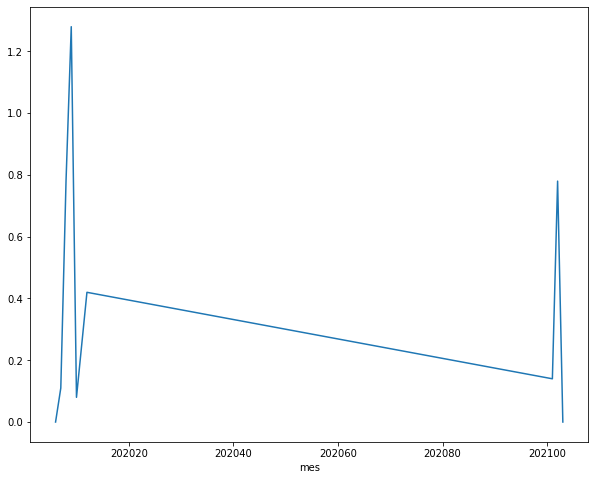

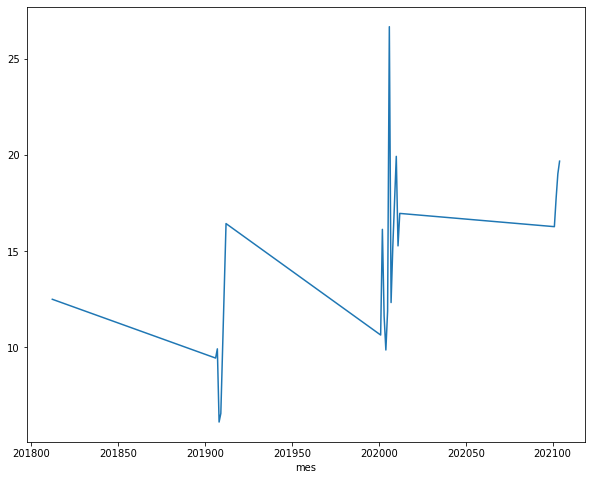

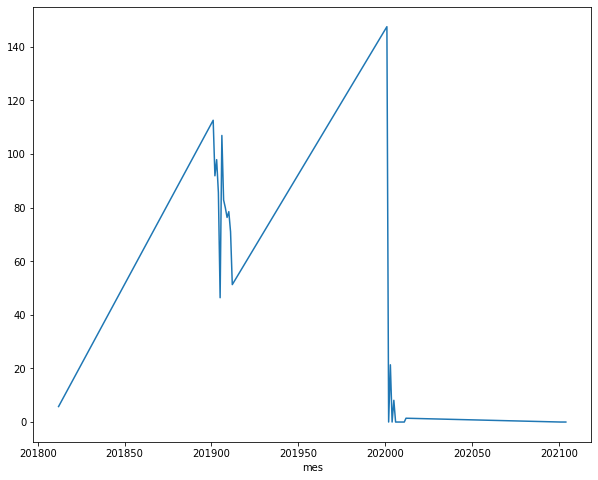

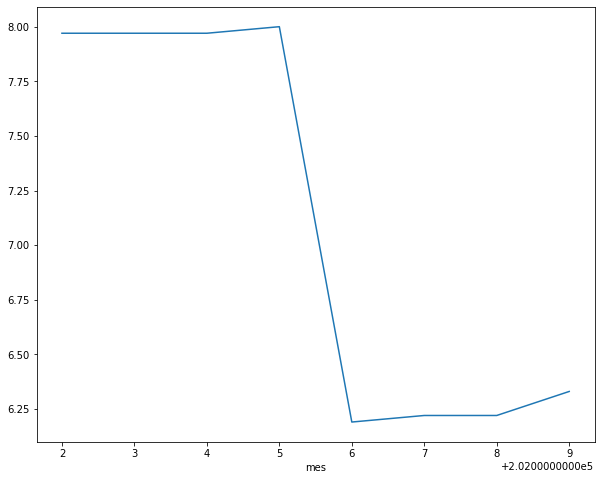

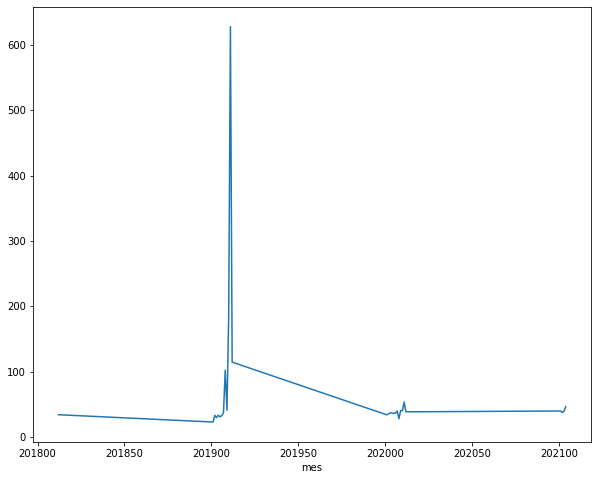

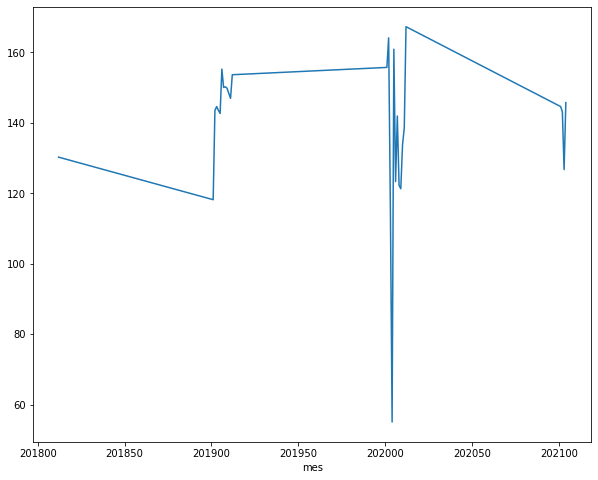

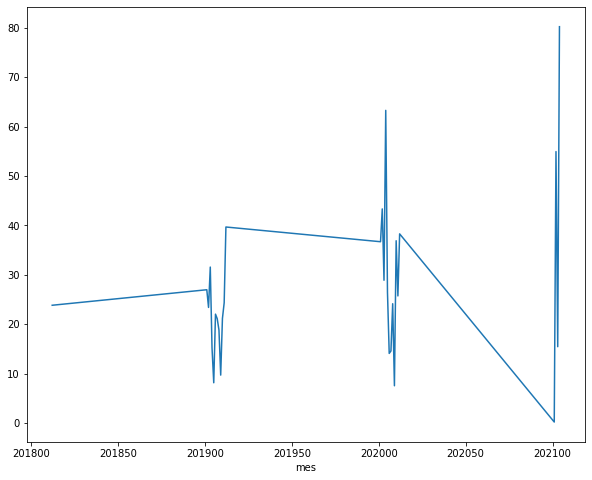

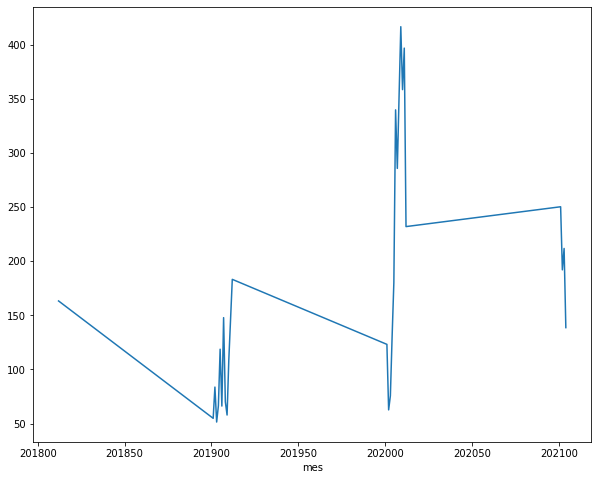

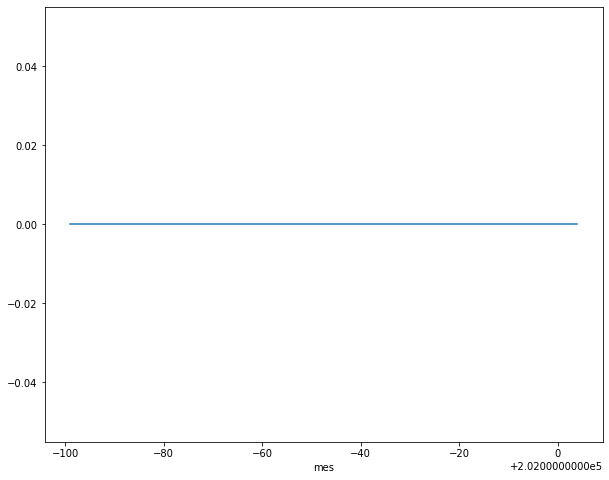

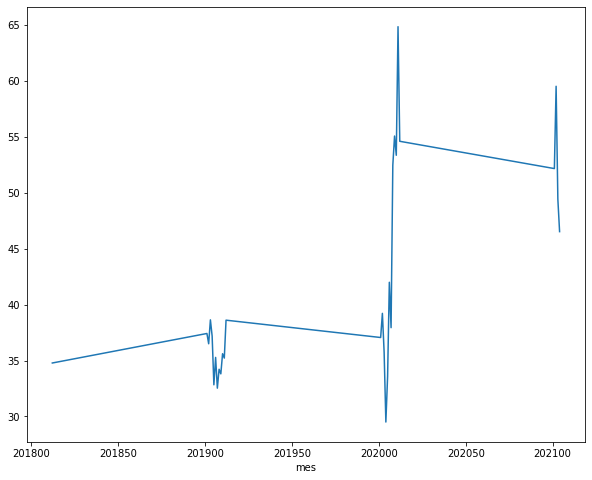

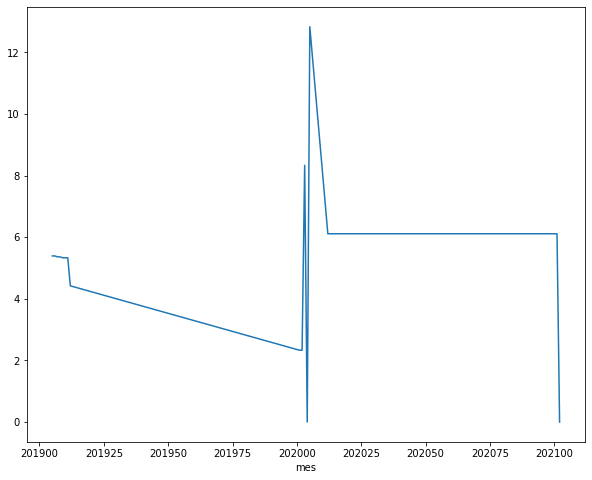

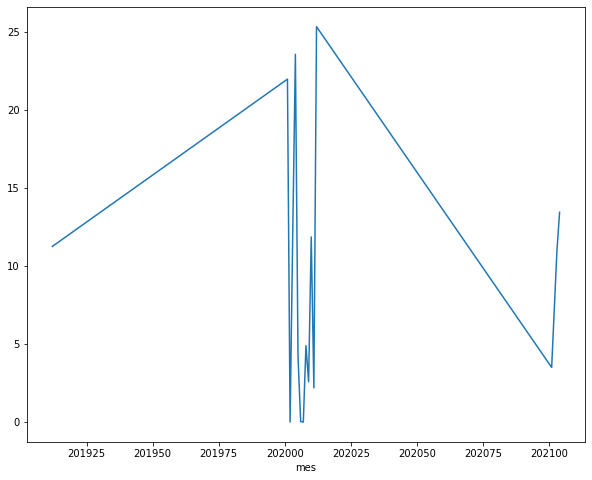

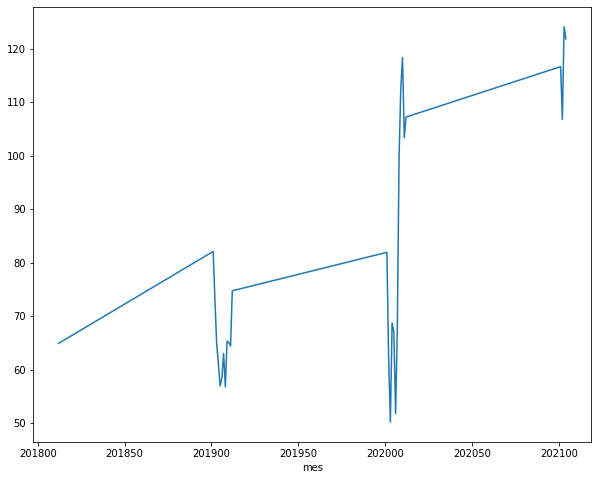

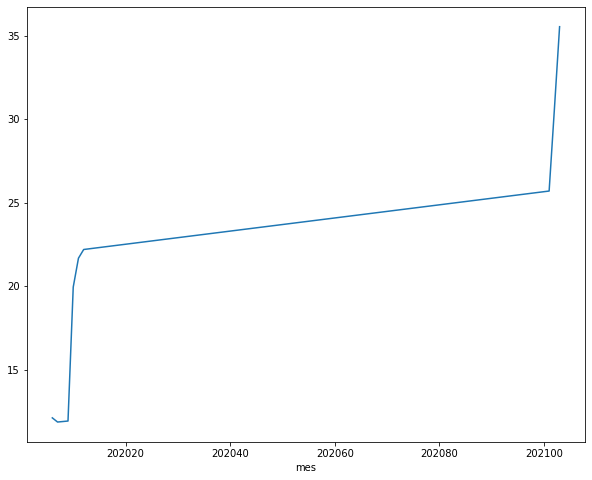

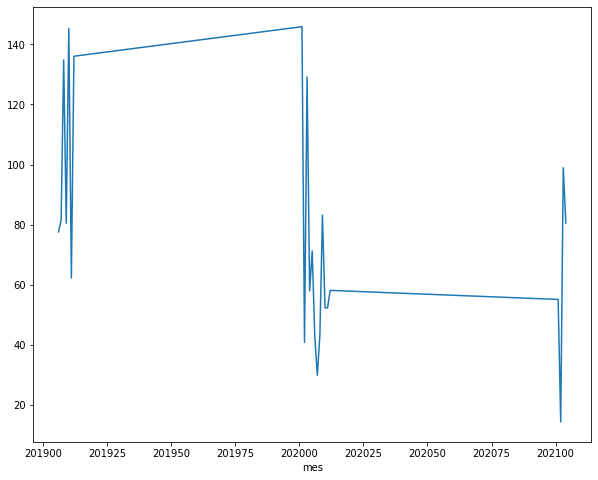

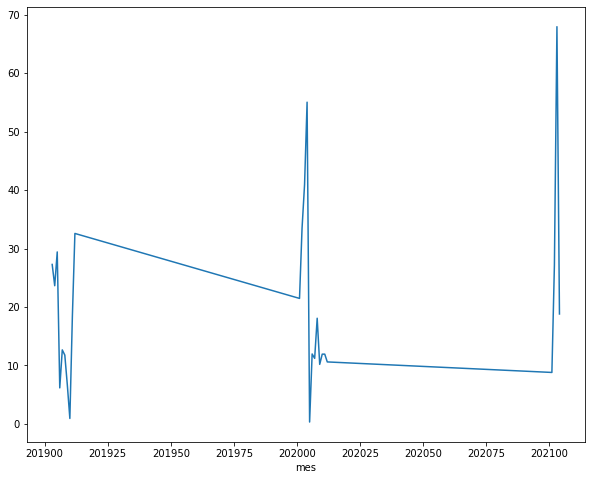

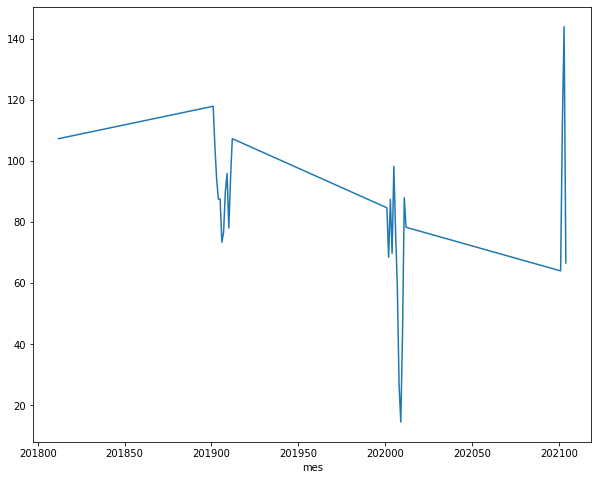

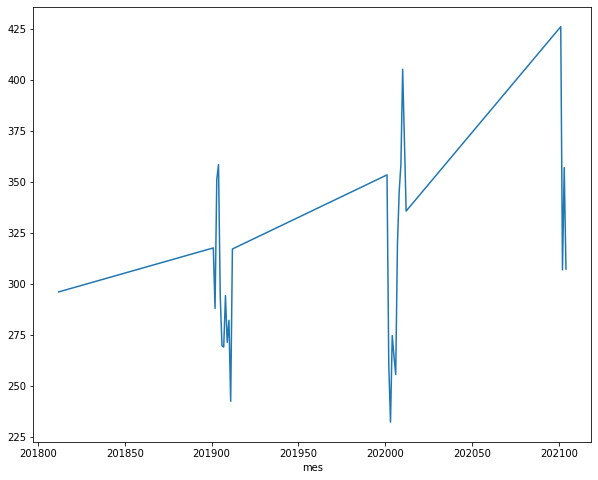

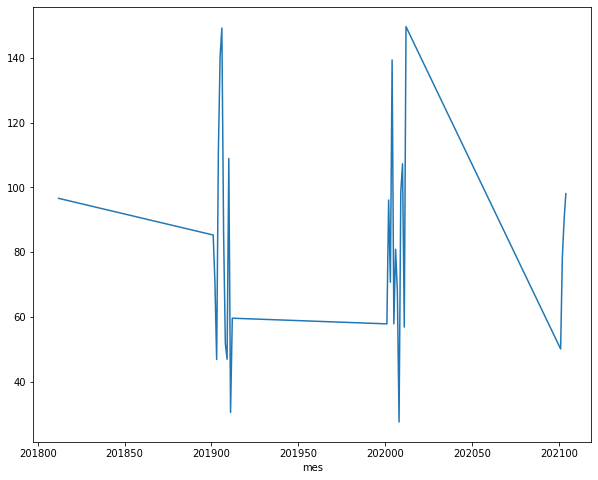

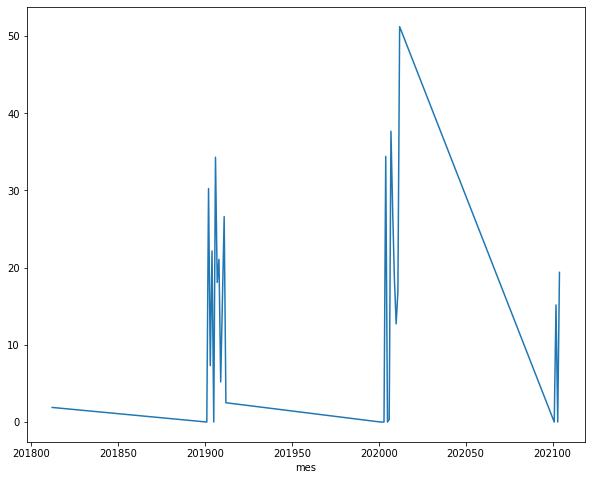

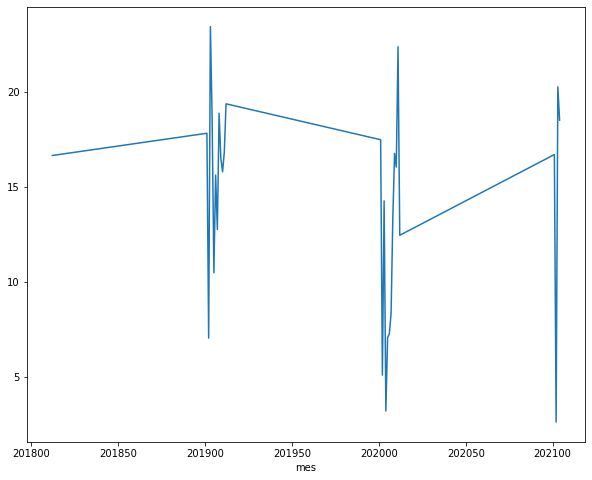

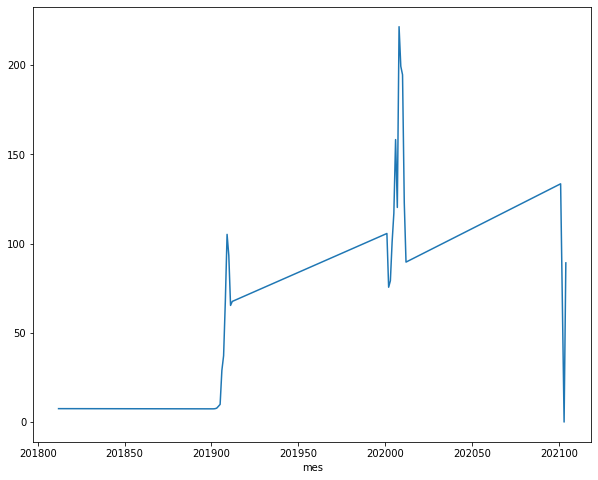

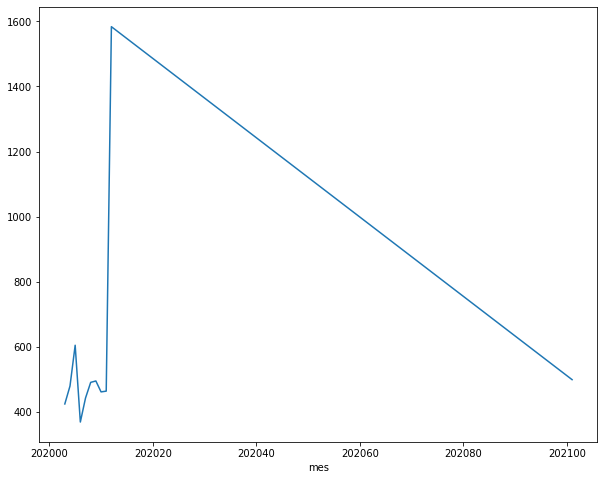

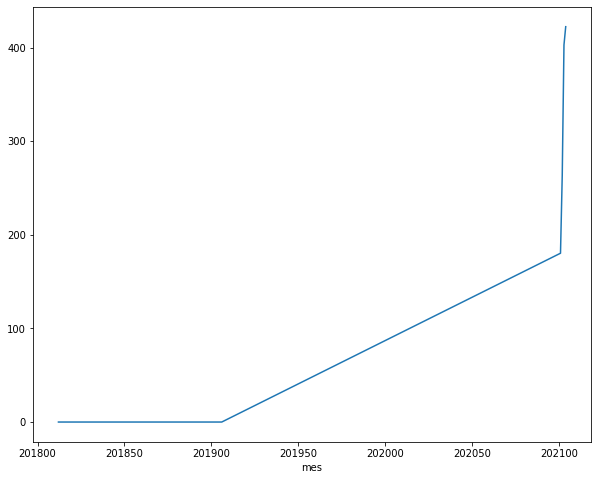

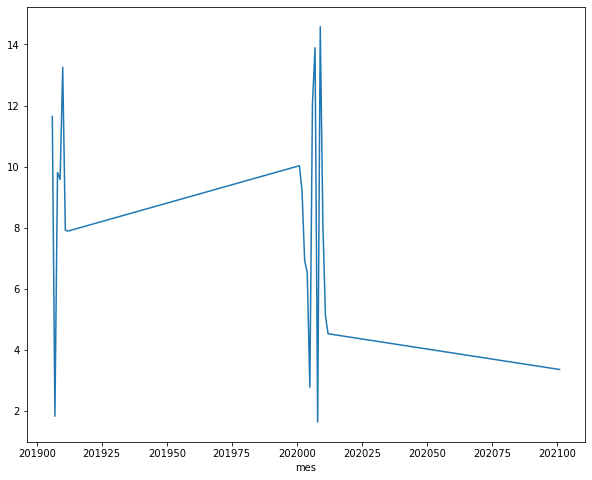

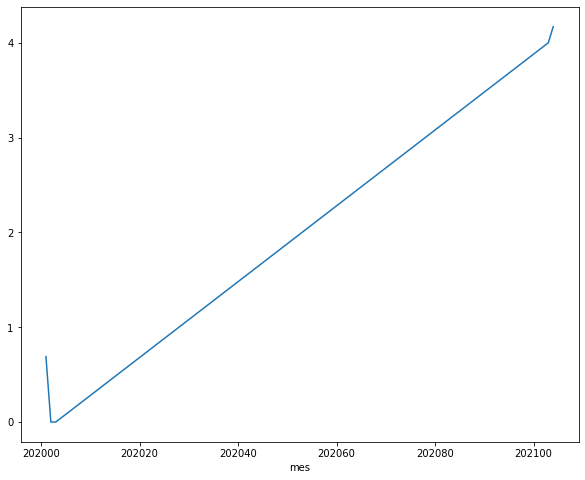

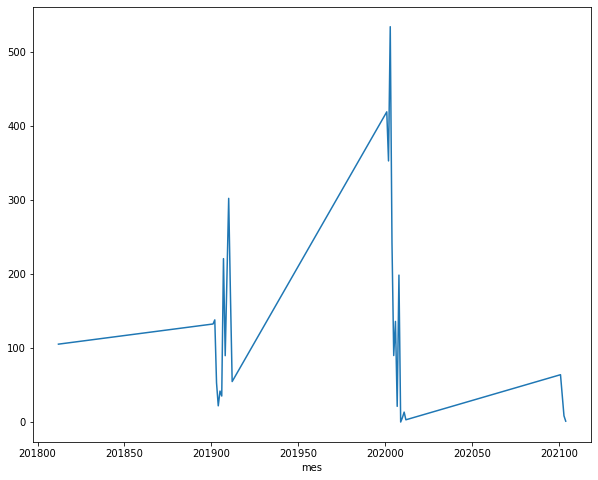

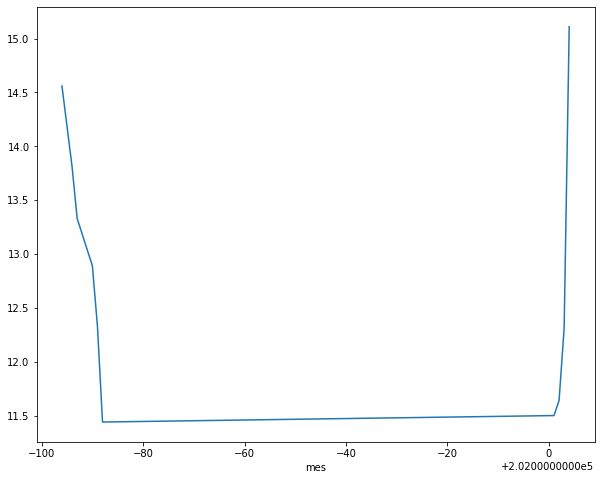

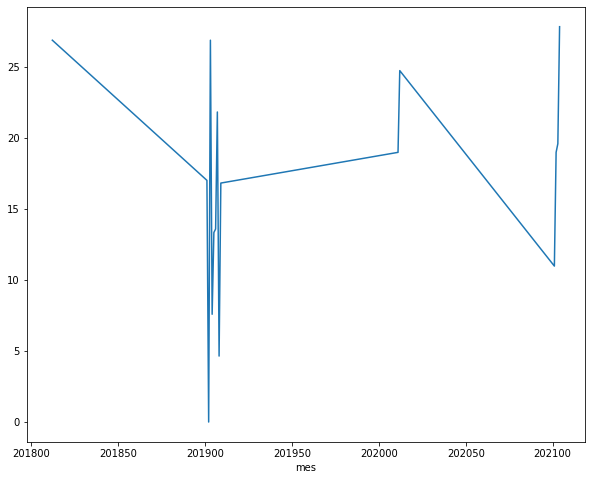

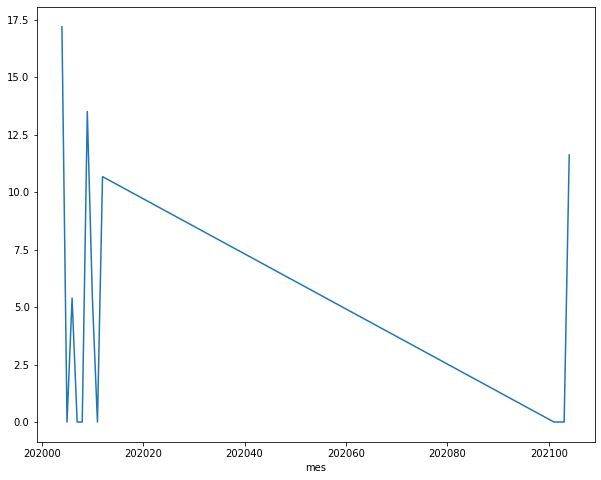

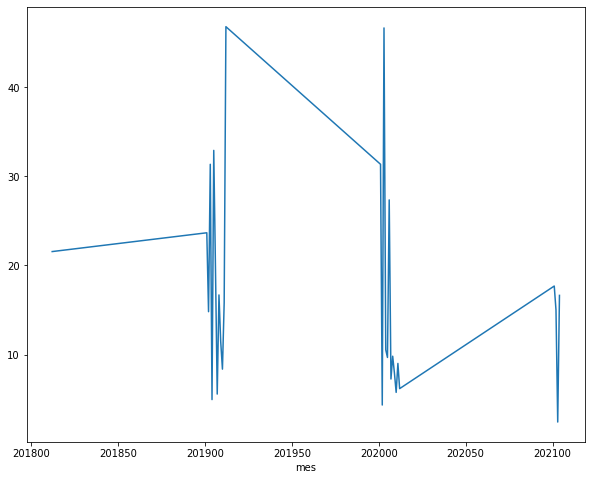

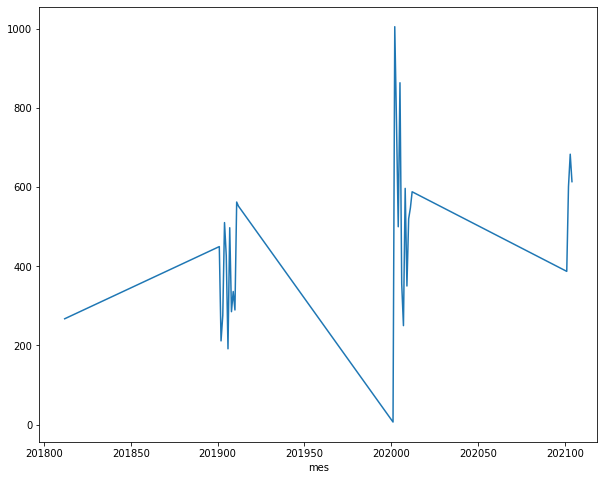

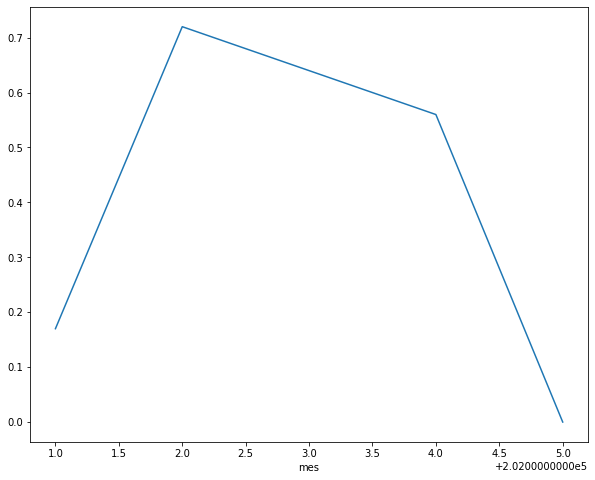

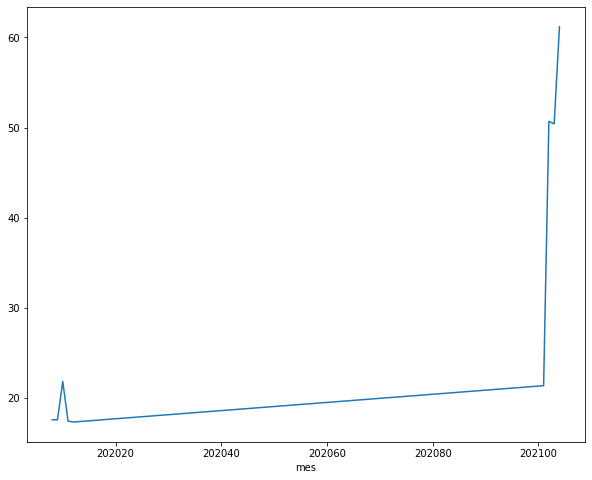

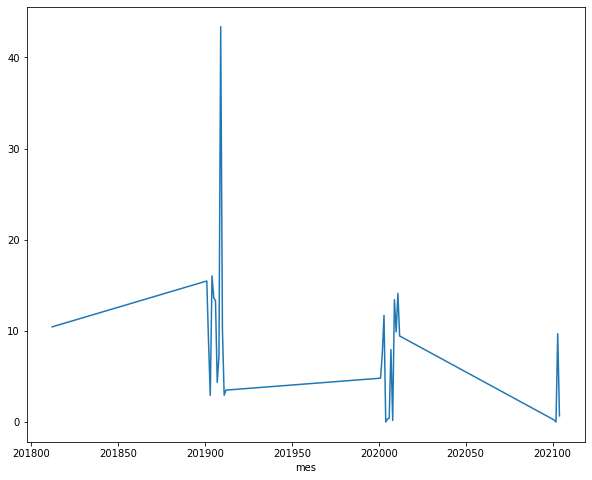

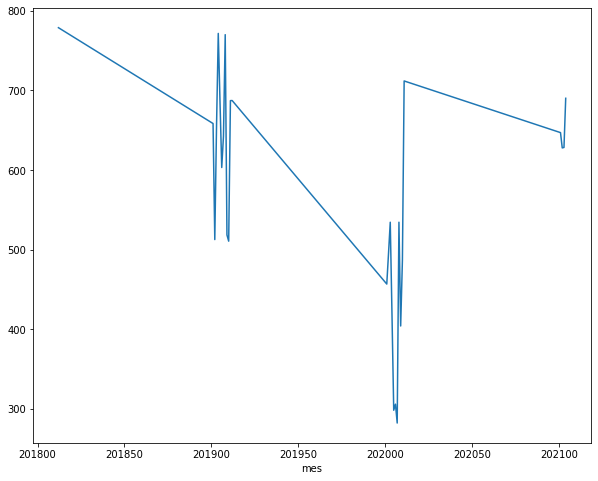

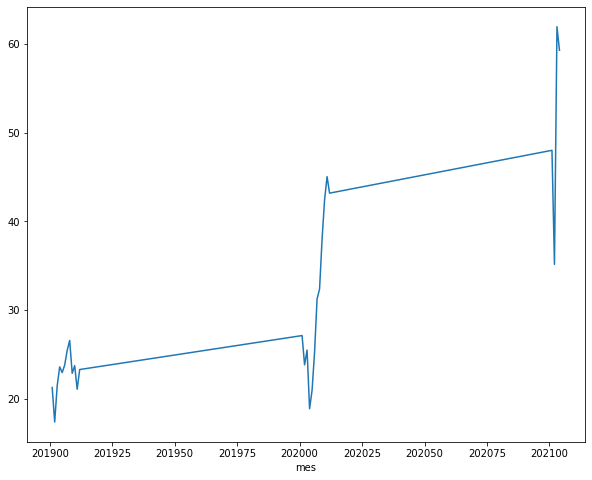

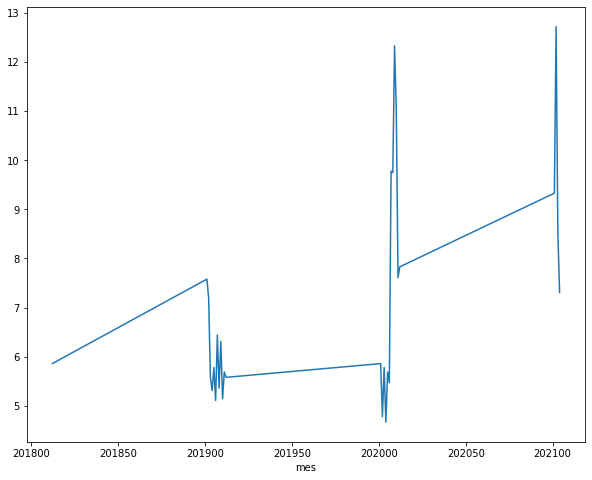

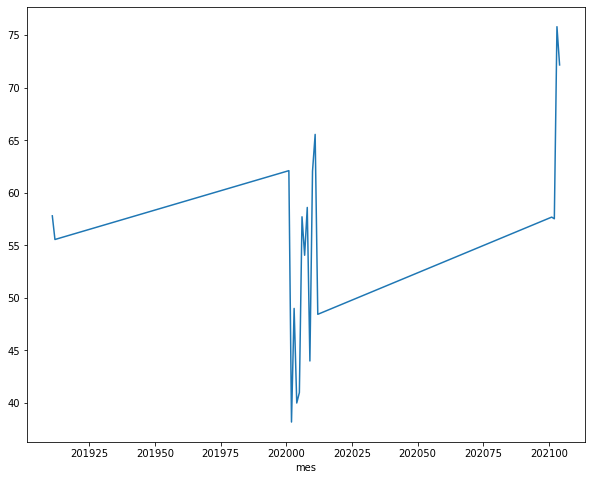

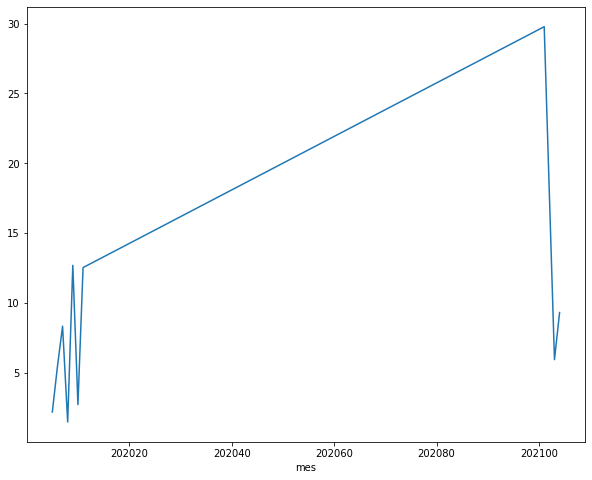

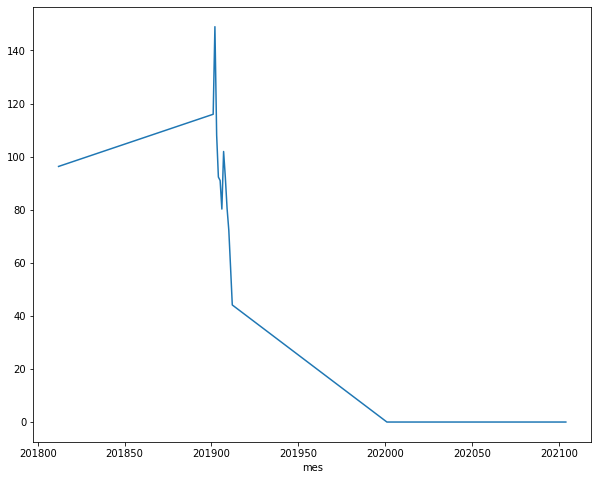

In [29]:
new_df = train_df.reset_index().set_index('mes').copy()

def plot_target_ts(df, id):
    df.query('id == @id')['target_mes'].sort_index().plot(figsize = (10,8));
    return plt.show()
    
for id in train_df.index[:100]:
    plot_target_ts(new_df, id)

> Tengo series de tiempo completamente independientes. Y a eso puedo agregarles variables.

- Metodologías a utilizar
- Modelo simple de regresión as-is.
- Usar sólo serie temporal de target + variables exógenas.

In [20]:
id = '60cb9d11c26f'
train_df.loc[id]#.mes.sort_values()

mes                   202005
tipo_ban                BAN1
tipo_seg            NO PROD3
categoria                 V2
tipo_com                COM4
tipo_cat              RUBRO5
tipo_cli                CLI1
VAR1_sum                 NaN
VAR1_prom                NaN
VAR1_trx                 NaN
VAR2_sum                 NaN
VAR2_prom                NaN
VAR2_trx                 NaN
VAR3_sum                 NaN
VAR3_prom                NaN
VAR3_trx                 NaN
VAR4_sum                 NaN
VAR4_prom                NaN
VAR4_trx                 NaN
VAR5_sum            500000.0
VAR5_prom           500000.0
VAR5_trx                 1.0
VAR6_sum                 NaN
VAR6_prom                NaN
VAR6_trx                 NaN
VAR7_sum       19221733000.0
VAR7_prom      19221733000.0
VAR7_trx                 1.0
VAR8_sum                 NaN
VAR8_prom                NaN
VAR8_trx                 NaN
VAR9_sum                 NaN
VAR9_prom                NaN
VAR9_trx                 NaN
VAR10_sum     

In [21]:
test_df.loc[id]#.mes.sort_values()

mes tipo_ban     tipo_seg categoria tipo_com tipo_cat  \
id                                                                       
60cb9d11c26f  202109     BAN1  PROD1/PROD2        V2     COM3   RUBRO5   
60cb9d11c26f  202108     BAN1     NO PROD3        V2     COM4   RUBRO5   
60cb9d11c26f  202107     BAN1     NO PROD3        V2     COM4   RUBRO5   
60cb9d11c26f  202105     BAN1     NO PROD3        V2     COM4   RUBRO5   
60cb9d11c26f  202106     BAN1     NO PROD3        V2     COM4   RUBRO5   

             tipo_cli  VAR1_sum  VAR1_prom  VAR1_trx  ...  VAR27_trx  \
id                                                    ...              
60cb9d11c26f     CLI1       NaN        NaN       NaN  ...        NaN   
60cb9d11c26f     CLI1       NaN        NaN       NaN  ...        NaN   
60cb9d11c26f     CLI1       NaN        NaN       NaN  ...        NaN   
60cb9d11c26f     CLI1       NaN        NaN       NaN  ...        NaN   
60cb9d11c26f     CLI1       NaN        NaN       NaN  ...        NaN   

              VAR28_sum  VAR28_prom  VAR28_trx   VAR29_prom  VAR29_ratio  \
id                                                                         
60cb9d11c26f        NaN         NaN        NaN  2812181.000        0.703   
60cb9d11c26f        NaN         NaN        NaN  3668816.250        0.917   
60cb9d11c26f        NaN         NaN        NaN  2801792.667        0.700   
60cb9d11c26f        NaN         NaN        NaN  2070685.400        0.518   
60cb9d11c26f        NaN         NaN        NaN   739736.333        0.185   

              VAR30_sum  periodo_mes  year  month  
id                                                 
60cb9d11c26f        NaN      2021-09  2021      9  
60cb9d11c26f        NaN      2021-08  2021      8  
60cb9d11c26f        NaN      2021-07  2021      7  
60cb9d11c26f        NaN      2021-05  2021      5  
60cb9d11c26f        NaN      2021-06  2021      6  

[5 rows x 71 columns]

In [22]:
(train_df.index.value_counts().value_counts()/train_df.index.nunique()).sort_index(ascending=False).cumsum()

29    0.340906
28    0.396926
27    0.428946
26    0.455477
25    0.475482
24    0.497652
23    0.522658
22    0.544310
21    0.569133
20    0.588436
19    0.610850
18    0.633051
17    0.661594
16    0.693157
15    0.711515
14    0.727982
13    0.746432
12    0.772627
11    0.802940
10    0.828434
9     0.851397
8     0.870914
7     0.894395
6     0.912601
5     0.930440
4     0.946908
3     0.963741
2     0.982496
1     1.000000
Name: id, dtype: float64

In [23]:
(test_df.index.value_counts().value_counts()/train_df.index.nunique()).sort_index(ascending=False)

34    0.055349
33    0.020493
32    0.012473
31    0.009332
30    0.006374
29    0.006404
28    0.006008
27    0.006221
26    0.005398
25    0.005154
24    0.004849
23    0.006495
22    0.005215
21    0.004269
20    0.002684
19    0.002409
18    0.001342
17    0.001281
16    0.000976
15    0.005489
14    0.004727
13    0.006069
12    0.013631
11    0.013265
10    0.010673
9     0.011924
8     0.012778
7     0.019822
6     0.011893
5     0.420468
4     0.120090
3     0.076574
2     0.061478
1     0.046505
Name: id, dtype: float64

> Una opción sería utilizar el target del pasado como predictor y usar padding para dejarlo en el set más largo. En este caso el mes, y las variables del último mes podrían ser utiles. 

> Se van a excluir del train_set todos los id que no estén en test...

# Creación de Datasets Iniciales

In [24]:
id_excluded = list(set(train_df.index)-set(test_df.index))
train_df.query("index not in @id_excluded").index.value_counts()

abdd0c8d3be5    29
eb41ed17561b    29
f81db4e4f606    29
bde96eacdfa2    29
3728451fa741    29
                ..
c9ed737b4d66     1
60cb9d11c26f     1
f98ba69ff73b     1
90761ec5f9ef     1
80b97cad1a90     1
Name: id, Length: 21504, dtype: int64

In [33]:
# Data NO Nula
train_df[cat_vars + target].to_csv('data/train_nonull.csv')
test_df[cat_vars].to_csv('data/test_nonull.csv')

In [40]:
cat_vars

['mes',
 'tipo_ban',
 'tipo_seg',
 'categoria',
 'tipo_com',
 'tipo_cat',
 'tipo_cli',
 'month',
 'year']

In [34]:
#Data No null / Excluded... Excluyendo ids que no están en test

train_df[cat_vars + target].query("index not in @id_excluded").to_csv('data/train_nonull_exc.csv')

In [35]:
# Con valores imputables
columnas = (train_df.isnull().sum()/len(train_df)).loc[lambda x: x< 0.26].index.tolist()
columnas.remove('target_mes')
train_df[columnas + target].drop(columns='periodo_mes').to_csv('data/train_imputable.csv')
test_df[columnas].drop(columns='periodo_mes').to_csv('data/test_imputable.csv')

In [39]:
columnas

['mes',
 'tipo_ban',
 'tipo_seg',
 'categoria',
 'tipo_com',
 'tipo_cat',
 'tipo_cli',
 'VAR5_sum',
 'VAR5_prom',
 'VAR5_trx',
 'VAR11_sum',
 'VAR12_sum',
 'VAR13_sum',
 'VAR14_sum',
 'VAR15_sum',
 'VAR18_sum',
 'VAR19_sum',
 'VAR20_sum',
 'VAR21_sum',
 'VAR22_sum',
 'periodo_mes',
 'year',
 'month']

In [36]:
train_df[columnas + target].query("index not in @id_excluded").to_csv('data/train_imputable_exc.csv')

In [37]:
train_df.drop(columns='periodo_mes').to_csv('data/train_full.csv')
test_df.drop(columns='periodo_mes').to_csv('data/test_full.csv')
train_df.drop(columns='periodo_mes').query("index not in @id_excluded").to_csv('data/train_full_exc.csv')

In [37]:
# Ejemplo Submissión

sub = pd.read_csv('data/ejemplo_submission.csv')
sub

id     mes  target_mes
0       8ae0058fa056  202105         0.5
1       8a4fc1159dee  202106         0.5
2       278764d539dd  202108         0.5
3       59ec2caa4756  202107         0.5
4       8a4fc1159dee  202105         0.5
...              ...     ...         ...
292011  11862d1f104b  201901         0.5
292012  11862d1f104b  201904         0.5
292013  11862d1f104b  202011         0.5
292014  11862d1f104b  201912         0.5
292015  11862d1f104b  201812         0.5

[292016 rows x 3 columns]

In [120]:
test_df

mes tipo_ban     tipo_seg categoria tipo_com tipo_cat  \
id                                                                        
8ae0058fa056  2021-05     BAN1  PROD1/PROD2        V2     COM3   RUBRO2   
8a4fc1159dee  2021-06     BAN1     NO PROD3        V5     COM4   RUBRO3   
278764d539dd  2021-08     BAN1        PROD1        V2     COM2   RUBRO6   
59ec2caa4756  2021-07     BAN3        PROD4        V2     COM2   RUBRO3   
8a4fc1159dee  2021-05     BAN1     NO PROD3        V5     COM4   RUBRO3   
...               ...      ...          ...       ...      ...      ...   
11862d1f104b  2019-01     BAN1        PROD1        V2     COM2   RUBRO6   
11862d1f104b  2019-04     BAN1        PROD1        V2     COM2   RUBRO6   
11862d1f104b  2020-11     BAN1        PROD1        V2     COM2   RUBRO6   
11862d1f104b  2019-12     BAN1        PROD1        V2     COM2   RUBRO6   
11862d1f104b  2018-12     BAN1        PROD1        V2     COM2   RUBRO6   

             tipo_cli   VAR1_sum  VAR1_prom  VAR1_trx  ...  VAR27_prom  \
id                                                     ...               
8ae0058fa056     CLI1        NaN        NaN       NaN  ...         NaN   
8a4fc1159dee     CLI1        NaN        NaN       NaN  ...         NaN   
278764d539dd     CLI1        NaN        NaN       NaN  ...         NaN   
59ec2caa4756     CLI1        NaN        NaN       NaN  ...         NaN   
8a4fc1159dee     CLI1        NaN        NaN       NaN  ...         NaN   
...               ...        ...        ...       ...  ...         ...   
11862d1f104b     CLI1   458070.0   7293.718      57.0  ...         NaN   
11862d1f104b     CLI1   529170.0   7363.883      74.0  ...         NaN   
11862d1f104b     CLI1  1636820.0  12399.841     131.0  ...         NaN   
11862d1f104b     CLI1  1070000.0   7720.121     136.0  ...         NaN   
11862d1f104b     CLI1  1090710.0   8174.314     134.0  ...         NaN   

              VAR27_trx     VAR28_sum    VAR28_prom  VAR28_trx  VAR29_prom  \
id                                                                           
8ae0058fa056        NaN           NaN           NaN        NaN   947308.75   
8a4fc1159dee        NaN  4.799142e+07  4.799142e+07      1.000         NaN   
278764d539dd        NaN           NaN           NaN        NaN         NaN   
59ec2caa4756        NaN           NaN           NaN        NaN         NaN   
8a4fc1159dee        NaN  3.955450e+08  2.029816e+08      1.903         NaN   
...                 ...           ...           ...        ...         ...   
11862d1f104b        NaN           NaN           NaN        NaN         NaN   
11862d1f104b        NaN           NaN           NaN        NaN         NaN   
11862d1f104b        NaN           NaN           NaN        NaN         NaN   
11862d1f104b        NaN           NaN           NaN        NaN         NaN   
11862d1f104b        NaN           NaN           NaN        NaN         NaN   

              VAR29_ratio  VAR30_sum  year  month  
id                                                 
8ae0058fa056        0.947        NaN  2021      5  
8a4fc1159dee          NaN        NaN  2021      6  
278764d539dd          NaN        NaN  2021      8  
59ec2caa4756          NaN        NaN  2021      7  
8a4fc1159dee          NaN        NaN  2021      5  
...                   ...        ...   ...    ...  
11862d1f104b          NaN        NaN  2019      1  
11862d1f104b          NaN        NaN  2019      4  
11862d1f104b          NaN        NaN  2020     11  
11862d1f104b          NaN        NaN  2019     12  
11862d1f104b          NaN        NaN  2018     12  

[292016 rows x 70 columns]